Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

# Import Framework

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime
import scipy
from sklearn.preprocessing import StandardScaler , LabelEncoder , RobustScaler , StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans 
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score , davies_bouldin_score
from sklearn.manifold import TSNE

In [2]:
pd.set_option('display.max_columns',99)

# Load Dataset

<h5><strong> Source Dataset </strong>:

[Link dataset](https://www.kaggle.com/datasets/vishakhdapat/customer-segmentation-clustering/data)

In [3]:
data = pd.read_csv('Dataset\customer_segmentation.csv')
data

<>:1: SyntaxWarning: invalid escape sequence '\c'
<>:1: SyntaxWarning: invalid escape sequence '\c'
C:\Users\aliff\AppData\Local\Temp\ipykernel_3292\1540931214.py:1: SyntaxWarning: invalid escape sequence '\c'
  data = pd.read_csv('Dataset\customer_segmentation.csv')


ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
0            0  04-09-2012       58       635         88              546   
1            1  08-03-2014       38        11          1                6   
2            0  21-08-2013       26       426         49              127   
3            0  10-02-2014       26        11          4               20   
4            0  19-01-2014       94       173         43              118   
...        ...         ...      ...       ...        ...              ...   
2235         1  13-06-2013       46       709         43              182   
2236         1  10-06-2014       56       406          0               30   
2237         0  25-01-2014       91       908         48              217   
2238         1  24-01-2014        8       428         30              214   
2239         1  15-10-2012       40        84          3               61   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0                 172                88            88                  3   
1                   2                 1             6                  2   
2                 111                21            42                  1   
3                  10                 3             5                  2   
4                  46                27            15                  5   
...               ...               ...           ...                ...   
2235               42               118           247                  2   
2236                0                 0             8                  7   
2237               32                12            24                  1   
2238               80                30            61                  2   
2239                2                 1            21                  3   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                   8                   10                  4   
1                   1                    1                  2   
2                   8                    2                 10   
3                   2                    0                  4   
4                   5                    3                  6   
...               ...                  ...                ...   
2235                9                    3                  4   
2236                8                    2                  5   
2237                2                    3                 13   
2238                6                    5                 10   
2239                3                    1                  4   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
0                     7             0             0             0   
1                     5             0             0             0   
2                     4             0             0             0   
3                     6             0             0             0   
4                     5             0             0             0   
...                 ...           ...           ...           ...   
2235                  5             0     

<h4 style='text-align:center;'><strong> CUSTOMER SEGMENTATION DATASET </strong></h4>
<ol>
    <li><span style='font-weight:bold;'>ID</span> : A unique identifier for each customer. It is used to identify customers individually. </li>
    <li><strong>Year_Birth </strong>: The year the customer was born </li>
    <li><strong>Education </strong>: The customer's education level. This provides insights into the educational background of customers and how it might relate to their buying behavior or segmentation.</li>
    <li><strong>Marital_Status </strong>: The customer's marital status </li>
    <li><strong>Income </strong>: The customer's annual income.</li>
    <li><strong>Kidhome </strong>: The number of children living at the customer's home.</li>
    <li><strong>Teenhome </strong>: The number of teenagers living at the customer's home. </li>
    <li><strong>Dt_Customer </strong>: The date when the customer first became a customer. This can be used to calculate the duration of the customer relationship or for retention analysis. </li>
    <li><strong>Recency </strong>: The number of days since the customer last interacted or made a purchase with the company.</li>
    <li><strong>MntWines </strong>: The amount the customer spent on wine.</li>
    <li><strong>MntFruits </strong>: The amount the customer spent on fruit.</li>
    <li><strong>MntMeatProducts </strong>: The amount the customer spent on meat products.</li>
    <li><strong>MntFishProducts </strong>: The amount the customer spent on fish products.</li>
    <li><strong>MntSweetProducts </strong>: The amount the customer spent on sweet products.</li>
    <li><strong>MntGoldProds </strong>: The amount the customer spent on gold products.</li>
    <li><strong>NumDealsPurchases </strong>: The number of purchases made using a discount or promotion by customer.</li>
    <li><strong>NumWebPurchases </strong>: The number of purchases made via the website.</li>
    <li><strong>NumCatalogPurchases </strong>: The number of purchases made through a catalog.</li>
    <li><strong>NumStorePurchases </strong>: The number of purchases made in a physical store. </li>
    <li><strong>NumWebVisitsMonth </strong>: The number of times the customer visits the website per month.</li>
    <li><strong>AcceptedCmp3 </strong>: Indicates whether the customer accepted campaign 3 (1 = accepted, 0 = not accepted).</li>
    <li><strong>AcceptedCmp4 </strong>: Indicates whether the customer accepted campaign 4 (1 = accepted, 0 = not accepted).</li>
    <li><strong>AcceptedCmp5 </strong>: Indicates whether the customer accepted campaign 5 (1 = accepted, 0 = not accepted).</li>
    <li><strong>AcceptedCmp1 </strong>: Indicates whether the customer accepted campaign 1 (1 = accepted, 0 = not accepted).</li>
    <li><strong>AcceptedCmp2 </strong>: Indicates whether the customer accepted campaign 2 (1 = accepted, 0 = not accepted).</li>
    <li><strong>Complain </strong>: Indicates whether the customer filed a complaint (1 = complained, 0 = did not complain).</li>
    <li><strong>Z_CostContact </strong>: This refers to the cost incurred by the company each time they interact with a customer (e.g., through emails, calls, or advertisements). </li>
    <li><strong>Z_Revenue </strong>: The revenue generated from each contact with the customer.</li>
    <li><strong>Response </strong>: Indicates whether the customer responded to or participated in a marketing campaign (1 = responded, 0 = did not respond).</li>



# Exploratory Data Analysis

In [4]:
# CHECK UNIQUE COLUMNS
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [5]:
# CHECK TYPE DATA EACH COLUMNS
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
# CHECK TOTAL OF UNIQUE CLASS IN EACH FEATURE/COLUMNS
data.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

In [7]:
# CHECK HOW MUCH NULL COLUMNS
data.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

Income Columns has 24 Missing Values. but we can handle it later

In [8]:
# CHECK DUPLICATED SAMPLE
data.duplicated().sum()

0

In [9]:
# CHECK DESCRIPTIVE STATISTICS
data.describe(include='all')

ID   Year_Birth   Education Marital_Status         Income  \
count    2240.000000  2240.000000        2240           2240    2216.000000   
unique           NaN          NaN           5              8            NaN   
top              NaN          NaN  Graduation        Married            NaN   
freq             NaN          NaN        1127            864            NaN   
mean     5592.159821  1968.805804         NaN            NaN   52247.251354   
std      3246.662198    11.984069         NaN            NaN   25173.076661   
min         0.000000  1893.000000         NaN            NaN    1730.000000   
25%      2828.250000  1959.000000         NaN            NaN   35303.000000   
50%      5458.500000  1970.000000         NaN            NaN   51381.500000   
75%      8427.750000  1977.000000         NaN            NaN   68522.000000   
max     11191.000000  1996.000000         NaN            NaN  666666.000000   

            Kidhome     Teenhome Dt_Customer      Recency     MntWines  \
count   2240.000000  2240.000000        2240  2240.000000  2240.000000   
unique          NaN          NaN         663          NaN          NaN   
top             NaN          NaN  31-08-2012          NaN          NaN   
freq            NaN          NaN          12          NaN          NaN   
mean       0.444196     0.506250         NaN    49.109375   303.935714   
std        0.538398     0.544538         NaN    28.962453   336.597393   
min        0.000000     0.000000         NaN     0.000000     0.000000   
25%        0.000000     0.000000         NaN    24.000000    23.750000   
50%        0.000000     0.000000         NaN    49.000000   173.500000   
75%        1.000000     1.000000         NaN    74.000000   504.250000   
max        2.000000     2.000000         NaN    99.000000  1493.000000   

          MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
count   2240.000000      2240.000000      2240.000000       2240.000000   
unique          NaN              NaN              NaN               NaN   
top             NaN              NaN              NaN               NaN   
freq            NaN              NaN              NaN               NaN   
mean      26.302232       166.950000        37.525446         27.062946   
std       39.773434       225.715373        54.628979         41.280498   
min        0.000000         0.000000         0.000000          0.000000   
25%        1.000000        16.000000         3.000000          1.000000   
50%        8.000000        67.000000        12.000000          8.000000   
75%       33.000000       232.000000        50.000000         33.000000   
max      199.000000      1725.000000       259.000000        263.000000   

        MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
count    2240.000000        2240.000000      2240.000000          2240.000000   
unique           NaN                NaN              NaN                  NaN   
top              NaN                NaN              NaN                  NaN   
freq             NaN                NaN              NaN                  NaN   
mean       44.021875           2.325000         4.084821             2.662054   
std        52.167439           1.932238         2.778714             2.923101   
min         0.000000           0.000000         0.000000             0.000000   
25%         9.000000           1.000000         2.000000             0.000000   
50%        24.000000           2.000000         4.000000             2.000000   
75%        56.000000           3.000000         6.000000             4.000000   
max       362.000000          15.000000        27.000000            28.000000   

        NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count         2240.000000        2240.000000   2240.000000   2240.000000   
unique                NaN                NaN           NaN           NaN   
top                   NaN                NaN           NaN           NaN   
fr

<h5><strong>HANDLING MISSING VALUES </h5></strong>

In [10]:
data.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [11]:
# DELETE MISSING VALUES

data_clean = data.dropna(axis=0, how='any')
data_clean

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
0            0  04-09-2012       58       635         88              546   
1            1  08-03-2014       38        11          1                6   
2            0  21-08-2013       26       426         49              127   
3            0  10-02-2014       26        11          4               20   
4            0  19-01-2014       94       173         43              118   
...        ...         ...      ...       ...        ...              ...   
2235         1  13-06-2013       46       709         43              182   
2236         1  10-06-2014       56       406          0               30   
2237         0  25-01-2014       91       908         48              217   
2238         1  24-01-2014        8       428         30              214   
2239         1  15-10-2012       40        84          3               61   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0                 172                88            88                  3   
1                   2                 1             6                  2   
2                 111                21            42                  1   
3                  10                 3             5                  2   
4                  46                27            15                  5   
...               ...               ...           ...                ...   
2235               42               118           247                  2   
2236                0                 0             8                  7   
2237               32                12            24                  1   
2238               80                30            61                  2   
2239                2                 1            21                  3   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                   8                   10                  4   
1                   1                    1                  2   
2                   8                    2                 10   
3                   2                    0                  4   
4                   5                    3                  6   
...               ...                  ...                ...   
2235                9                    3                  4   
2236                8                    2                  5   
2237                2                    3                 13   
2238                6                    5                 10   
2239                3                    1                  4   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
0                     7             0             0             0   
1                     5             0             0             0   
2                     4             0             0             0   
3                     6             0             0             0   
4                     5             0             0             0   
...                 ...           ...           ...           ...   
2235                  5             0     

In [12]:
# CHECK BACK MISSING VALUES
data_clean.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [13]:
# SEPARATING NUMERIC AND OBJECT DATA

object_data = data_clean.select_dtypes('object')
numeric_data = data_clean.select_dtypes(('int64','float64'))
numeric_data.drop(columns=['Z_CostContact','Z_Revenue'],inplace=True)  # DROP USELESS FEATURE

object_data.shape , numeric_data.shape , type(object_data) , type(numeric_data)

((2216, 3),
 (2216, 24),
 pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame)

## Check Distribution Data

C:\Users\aliff\AppData\Local\Temp\ipykernel_3292\1222491679.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  axes = sns.countplot(data= object_data, x = 'Education', palette='Set2')


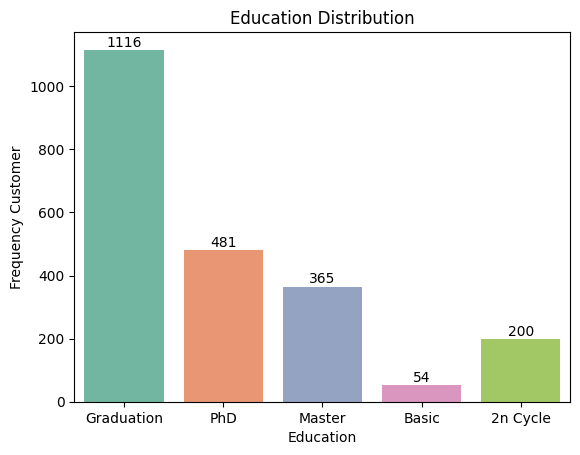

In [14]:
# DISPLAY EDUCATION BAR CHART
axes = sns.countplot(data= object_data, x = 'Education', palette='Set2')

# TO DISPLAY VALUE IN EACH BAR
for ax in axes.patches:
    height = ax.get_height()  # GET HEIGHT AXIS
    axes.text(x = ax.get_x() + ax.get_width() / 2. , y = height + 1, s = int(height), ha='center', va='bottom', fontsize=10)

plt.title('Education Distribution')
plt.ylabel('Frequency Customer')
plt.show()

C:\Users\aliff\AppData\Local\Temp\ipykernel_3292\1898361527.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  axes = sns.countplot(data= object_data, x= 'Marital_Status', palette='Set2', stat='count')


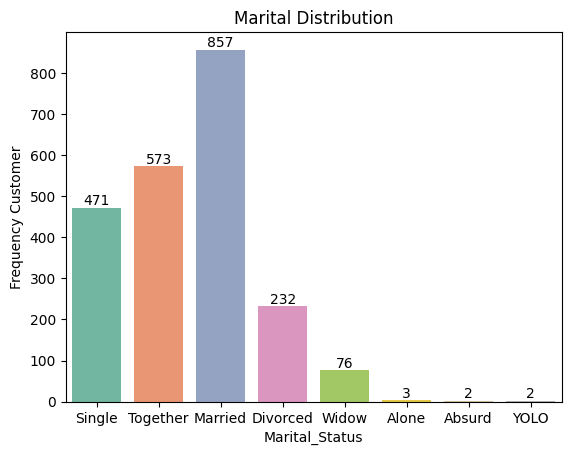

In [15]:
# DISPLAY MARITAL STATUS

axes = sns.countplot(data= object_data, x= 'Marital_Status', palette='Set2', stat='count')

for ax in axes.patches:
    height = ax.get_height()

    axes.text(x = ax.get_x() + ax.get_width() / 2, y = height , s= int(height), ha='center', va='bottom', fontsize=10)

plt.title('Marital Distribution')
plt.ylabel('Frequency Customer')
plt.show()

Text(0.5, 1.0, 'Distribution of marital status based on education')

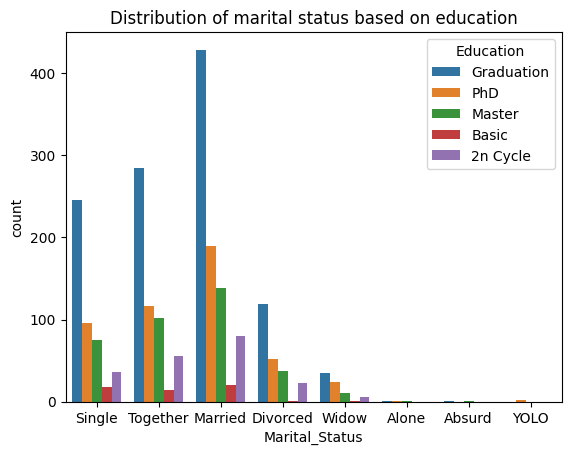

In [16]:

sns.countplot(data= object_data, x='Marital_Status', hue='Education')
plt.title('Distribution of marital status based on education')


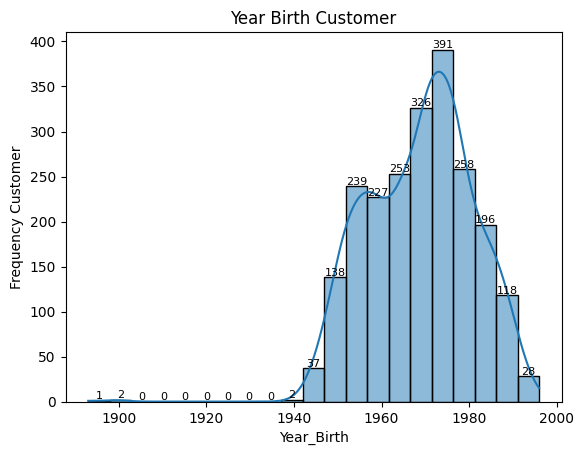

In [17]:
# DISPLAY Year Birth Customer

axes = sns.histplot(data= numeric_data, x='Year_Birth', kde=True, binwidth=5)

# DISPLAY VALUE IN EACH BAR
for ax in axes.patches:
    height = ax.get_height()

    axes.text(x = ax.get_x() + ax.get_width() / 2, y = height , s= int(height), ha='center', va='bottom', fontsize=8)

plt.title('Year Birth Customer')
plt.ylabel('Frequency Customer')
plt.show()

Text(0.5, 1.0, 'Distribution of Birth Year Based on Marital Status')

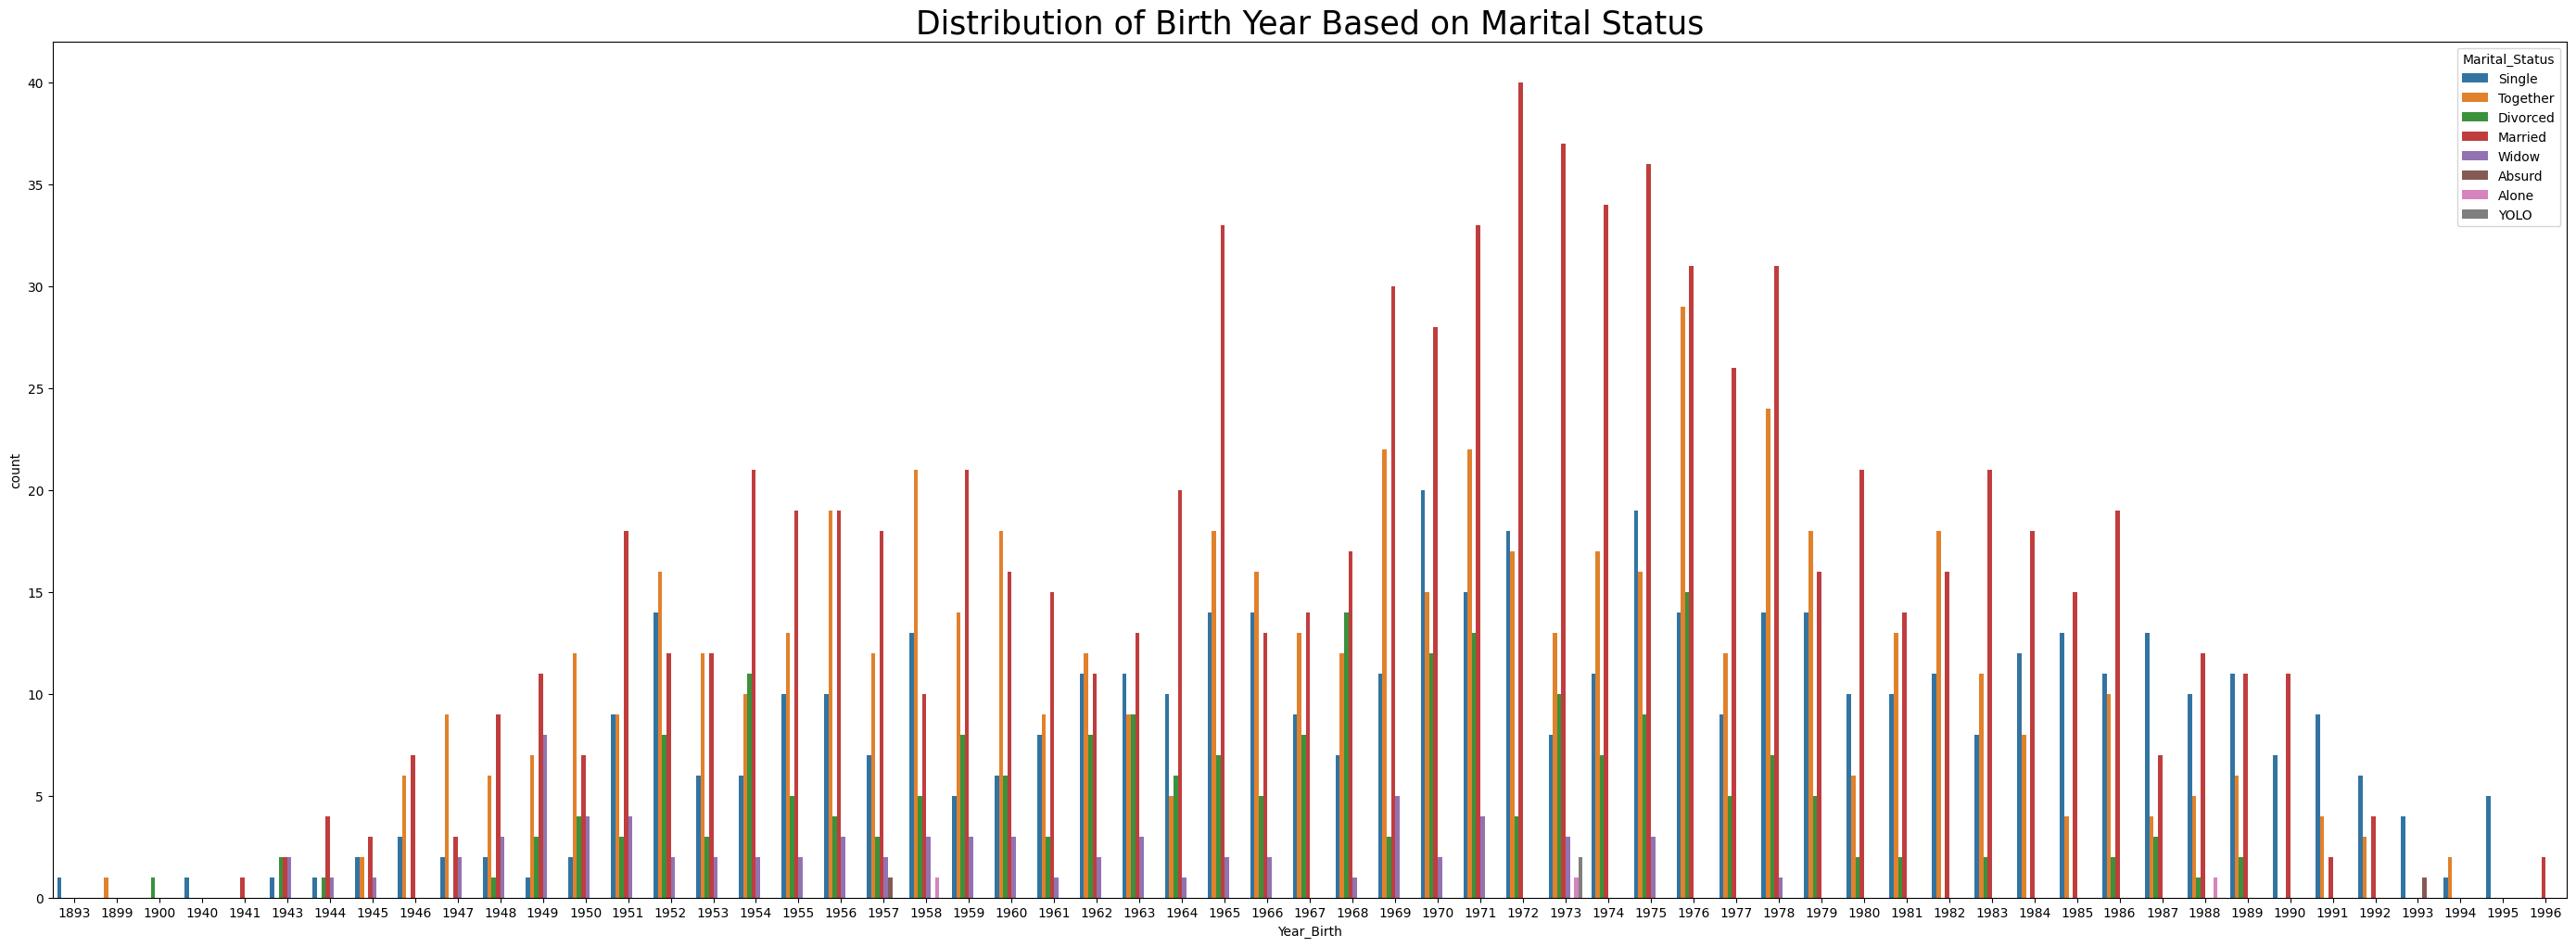

In [18]:
plt.figure(figsize=(35,12))
sns.countplot(data= data, x='Year_Birth', hue='Marital_Status')
plt.title('Distribution of Birth Year Based on Marital Status',fontsize=25)

C:\Users\aliff\AppData\Local\Temp\ipykernel_3292\909901550.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  axes = sns.countplot(data= numeric_data, x='Kidhome', palette= 'pastel', stat='count', ax= Axes[0])
C:\Users\aliff\AppData\Local\Temp\ipykernel_3292\909901550.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  axes = sns.countplot(data=numeric_data, x='Teenhome', palette='pastel', stat='count', ax= Axes[1])


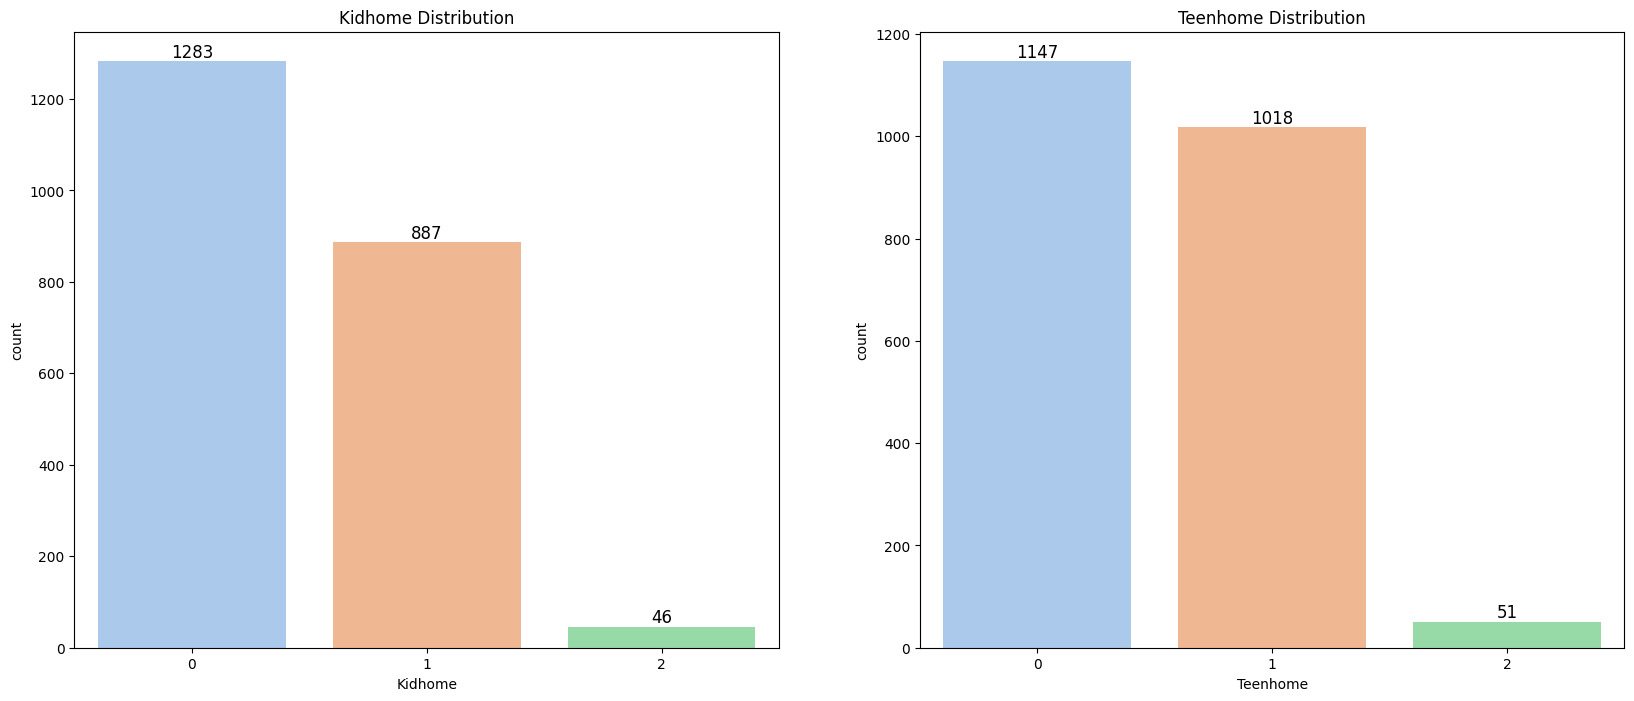

In [19]:
# DISPLAY KIDHOME AND TEENHOME

fig , Axes = plt.subplots(nrows=1 , ncols=2, figsize=(20,8))

# DISPLAY KIDHOME INFO
axes = sns.countplot(data= numeric_data, x='Kidhome', palette= 'pastel', stat='count', ax= Axes[0])
Axes[0].set_title('Kidhome Distribution')
for ax in axes.patches:
    height = ax.get_height()
    axes.text(x= ax.get_x() + ax.get_width() / 2. , y = height , s=int(height), ha='center', va='bottom',fontsize=12)



# DISPLAY TEENHOME INFO
axes = sns.countplot(data=numeric_data, x='Teenhome', palette='pastel', stat='count', ax= Axes[1])
Axes[1].set_title('Teenhome Distribution')
for ax in axes.patches:
    height = ax.get_height()
    axes.text(x= ax.get_x() + ax.get_width() / 2, y = height, s= int(height), ha='center', va='bottom', fontsize=12)

plt.show()

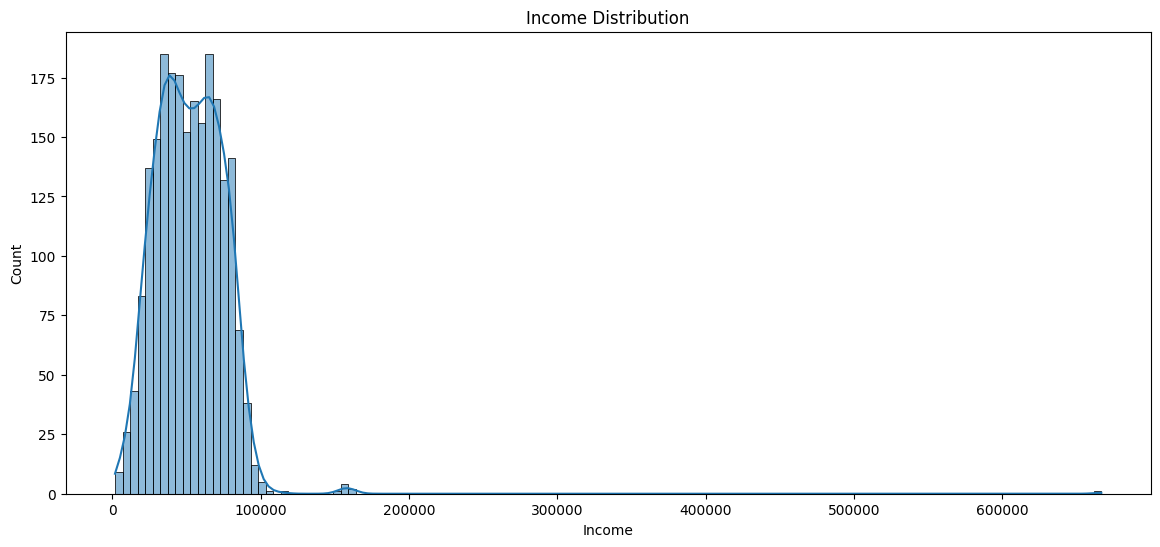

In [20]:
# DISPLAY INCOME CHART

plt.figure(figsize=(14,6))
sns.histplot(data= numeric_data, x='Income', kde=True)

plt.title('Income Distribution')
plt.show()

C:\Users\aliff\AppData\Local\Temp\ipykernel_3292\666398486.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data= numeric_data, y='Income', palette='deep')
C:\Users\aliff\AppData\Local\Temp\ipykernel_3292\666398486.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data= numeric_data, y='Income', palette='bright')


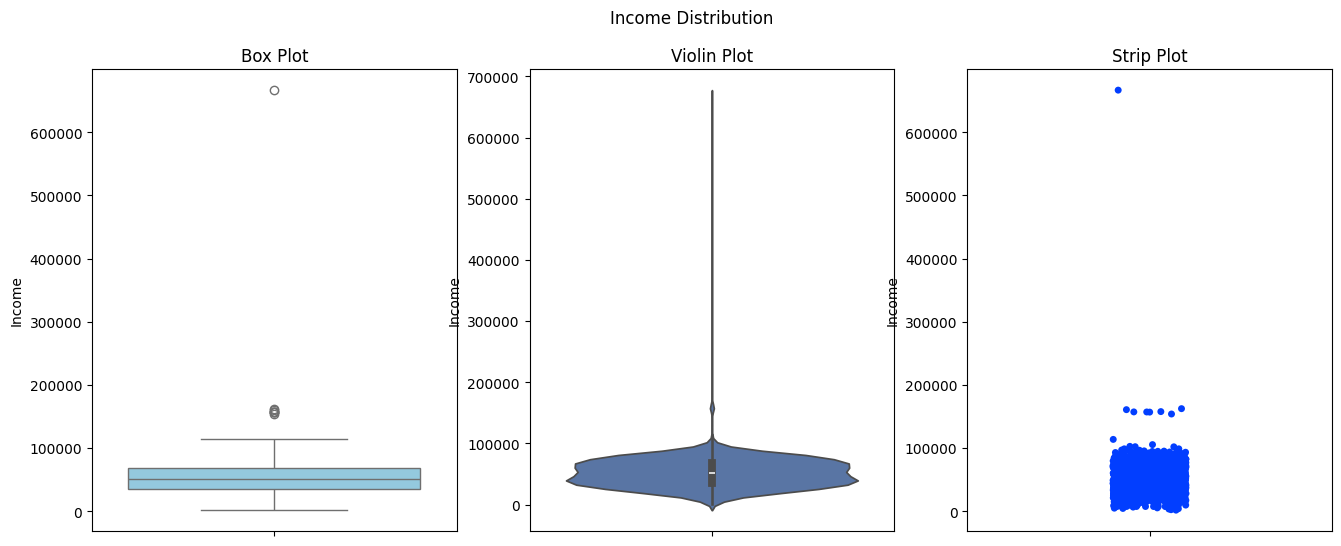

In [21]:
# DISPLAY INCOME DISTRIBUTION USING BOXPLOT AND VIOLINPLOT

plt.figure(figsize=(16,6))

plt.subplot(1,3,1)
sns.boxplot(data= numeric_data, y='Income', color='skyblue')
plt.title('Box Plot')

plt.subplot(1,3,2)
sns.violinplot(data= numeric_data, y='Income', palette='deep')
plt.title('Violin Plot')

plt.subplot(1,3,3)
sns.stripplot(data= numeric_data, y='Income', palette='bright')
plt.title('Strip Plot')

plt.suptitle('Income Distribution')
plt.show()

There is 1 sample where the difference is very big. 

In [22]:
# DELETE OUTLIER

data_clean = data_clean[data_clean['Income'] < 120000]
data_clean

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
0            0  04-09-2012       58       635         88              546   
1            1  08-03-2014       38        11          1                6   
2            0  21-08-2013       26       426         49              127   
3            0  10-02-2014       26        11          4               20   
4            0  19-01-2014       94       173         43              118   
...        ...         ...      ...       ...        ...              ...   
2235         1  13-06-2013       46       709         43              182   
2236         1  10-06-2014       56       406          0               30   
2237         0  25-01-2014       91       908         48              217   
2238         1  24-01-2014        8       428         30              214   
2239         1  15-10-2012       40        84          3               61   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0                 172                88            88                  3   
1                   2                 1             6                  2   
2                 111                21            42                  1   
3                  10                 3             5                  2   
4                  46                27            15                  5   
...               ...               ...           ...                ...   
2235               42               118           247                  2   
2236                0                 0             8                  7   
2237               32                12            24                  1   
2238               80                30            61                  2   
2239                2                 1            21                  3   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                   8                   10                  4   
1                   1                    1                  2   
2                   8                    2                 10   
3                   2                    0                  4   
4                   5                    3                  6   
...               ...                  ...                ...   
2235                9                    3                  4   
2236                8                    2                  5   
2237                2                    3                 13   
2238                6                    5                 10   
2239                3                    1                  4   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
0                     7             0             0             0   
1                     5             0             0             0   
2                     4             0             0             0   
3                     6             0             0             0   
4                     5             0             0             0   
...                 ...           ...           ...           ...   
2235                  5             0     

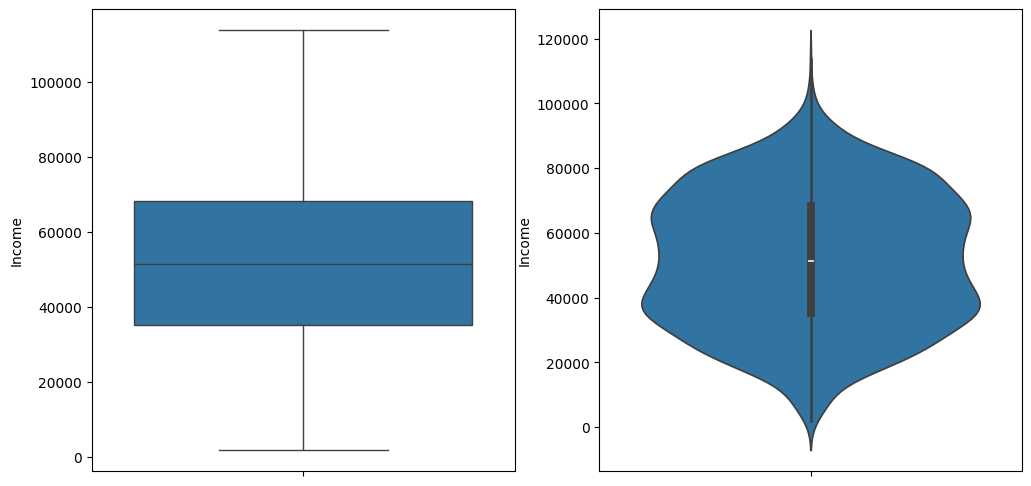

In [23]:
# CHECK IT BACK

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.boxplot(data= data_clean, y='Income')

plt.subplot(1,2,2)
sns.violinplot(data= data_clean, y='Income')

plt.show()


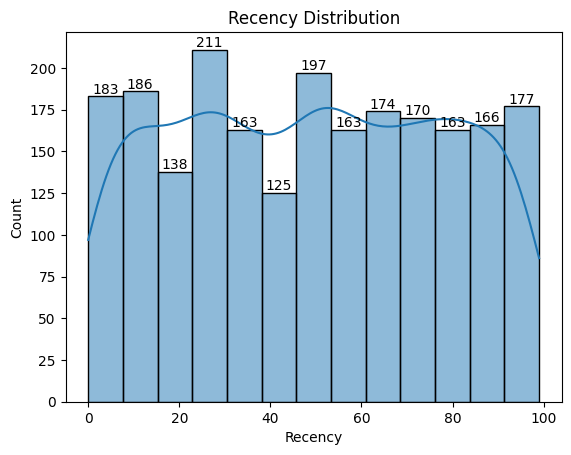

In [24]:
# DISPLAY RECENCY COLUMNS INFO

axes = sns.histplot(data= numeric_data, x='Recency', kde=True)

# DISPLAY VALUE IN EACH BAR
for ax in axes.patches:
    axes.text(x= ax.get_x() + ax.get_width() / 2 , y = ax.get_height() , s= ax.get_height(), ha='center', va='bottom', fontsize=10)

plt.title('Recency Distribution')
plt.show()

C:\Users\aliff\AppData\Local\Temp\ipykernel_3292\4000968568.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_clean, y='Recency', palette='pastel')
C:\Users\aliff\AppData\Local\Temp\ipykernel_3292\4000968568.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data_clean, y='Recency', palette='deep')


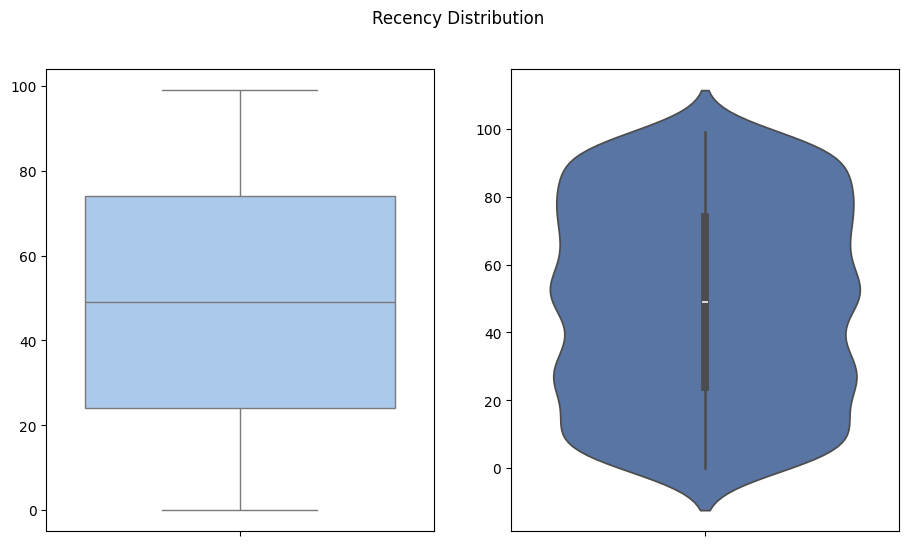

In [25]:
# RECENCY BOXPLOT AND VIOLIN PLOT

plt.figure(figsize=(11,6))

plt.subplot(1,2,1)
sns.boxplot(data=data_clean, y='Recency', palette='pastel')
plt.ylabel('')

plt.subplot(1,2,2)
sns.violinplot(data=data_clean, y='Recency', palette='deep')
plt.ylabel('')

plt.suptitle('Recency Distribution')
plt.show()

In [26]:

fig1 = px.histogram(data_frame=data, x='Recency', color='Marital_Status', title='Recency Distribution based on Marital Status')
fig2 = px.histogram(data_frame=data, x='Recency', color='Education', title='Recency Distribution based on Education')


fig1.show()
fig2.show()

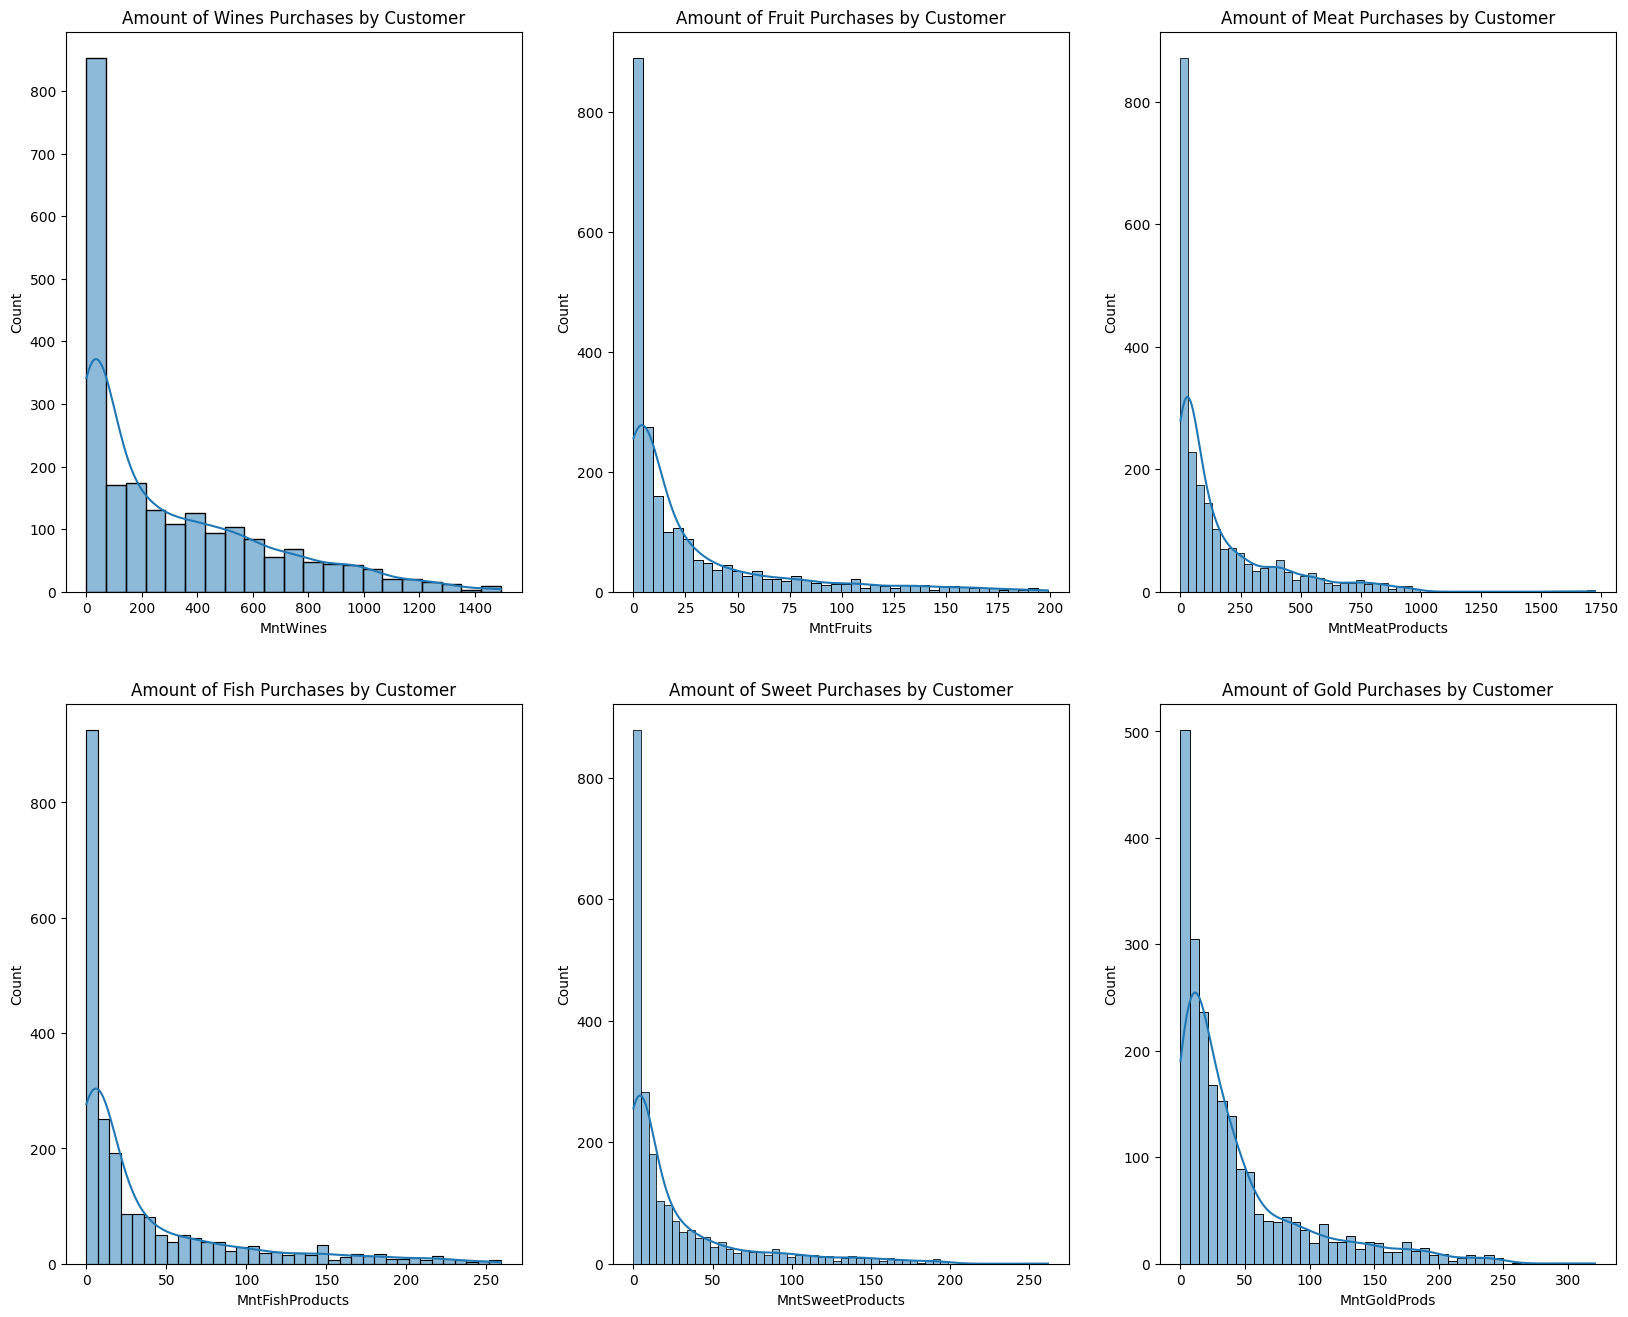

In [27]:
# DISPLAY 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts','MntSweetProducts', 'MntGoldProds' Columns

fig , axes = plt.subplots(nrows=2, ncols=3, figsize=(20,16))

sns.histplot(data= numeric_data, x='MntWines', kde=True, ax= axes[0,0])
axes[0,0].set_title('Amount of Wines Purchases by Customer')

sns.histplot(data= numeric_data, x='MntFruits', kde=True, ax= axes[0,1])
axes[0,1].set_title('Amount of Fruit Purchases by Customer')

sns.histplot(data= numeric_data, x='MntMeatProducts', kde=True, ax= axes[0,2])
axes[0,2].set_title('Amount of Meat Purchases by Customer')

sns.histplot(data= numeric_data, x='MntFishProducts', kde=True, ax=axes[1,0])
axes[1,0].set_title('Amount of Fish Purchases by Customer')

sns.histplot(data= numeric_data, x='MntSweetProducts', kde=True, ax=axes[1,1])
axes[1,1].set_title('Amount of Sweet Purchases by Customer')

sns.histplot(data= numeric_data, x='MntGoldProds', kde=True, ax=axes[1,2])
axes[1,2].set_title('Amount of Gold Purchases by Customer')


plt.show()


In [28]:
# Distribution of Wines Purchases based on Education , Marital_Status , Kidhome , Teenhome

fig1 = px.histogram(data_frame= data, x='MntWines', color='Education', title='Distribution of Wine Purchases by Education')
fig2 = px.histogram(data_frame= data, x='MntWines', color='Marital_Status', title='Distribution of Wines Purchases by Marital Status')
fig3 = px.histogram(data_frame= data, x='MntWines', color='Kidhome', title='Distribution of Wines Purchases by Kidhome')
fig4 = px.histogram(data_frame= data, x='MntWines', color='Teenhome', title='Distribution of Wines Purchases by Teenhome')

fig1.show()
fig2.show()
fig3.show()
fig4.show()


# CHECK USING T-TEST 

# Is there a significant difference in purchasing wines between customers who have Kid and those who do not?
customer_no_kid = data[data['Kidhome'] == 0]['MntWines']
customer_with_kid = data[data['Kidhome'] >= 1]['MntWines']

t_stat , p_value = scipy.stats.ttest_ind(a = customer_no_kid, b= customer_with_kid)

print('Result T-Test:\n')
if p_value < 0.05: 
    print("There is a significant difference in Purchasing Wines between Customers who have Kid and those who dont")
else: 
    print("There is no significant difference in Purchasing Wines between Customers who have Kid and those who dont")
print('\n\n')

# Is there a significant difference in purchasing wines between customers who have Kid and those who do not?
customer_no_teen = data[data['Teenhome'] == 0]['MntWines']
customer_with_teen = data[data['Teenhome'] >= 1]['MntWines']

print('Result T-Test:\n')
if p_value < 0.05: 
    print("There is a significant difference in Purchasing Wines between Customers who have Teen and those who dont")
else: 
    print("There is no significant difference in Purchasing Wines between Customers who have Teen and those who dont")

Result T-Test:

There is a significant difference in Purchasing Wines between Customers who have Kid and those who dont



Result T-Test:

There is a significant difference in Purchasing Wines between Customers who have Teen and those who dont


<ul>
    <li>Most customers spend less than 200 on wine.</li>
    <li>basic education level only spends 0-50 for wine</li>
    <li>The majority of customers have a graduate education level</li>
    <li>Customers who don't have children spend more wines than those who have children</li>
</ul>

In [29]:
# Distribution of Fruits Purchases

fig1 = px.histogram(data_frame=data, x='MntFruits', color='Kidhome', title='Distribution of Fruits Purchases based Kidhome')
fig2 = px.histogram(data_frame=data, x='MntFruits', color='Teenhome', title='Distribution of Fruits Purchases based Teenhome')

fig1.show()
fig2.show()

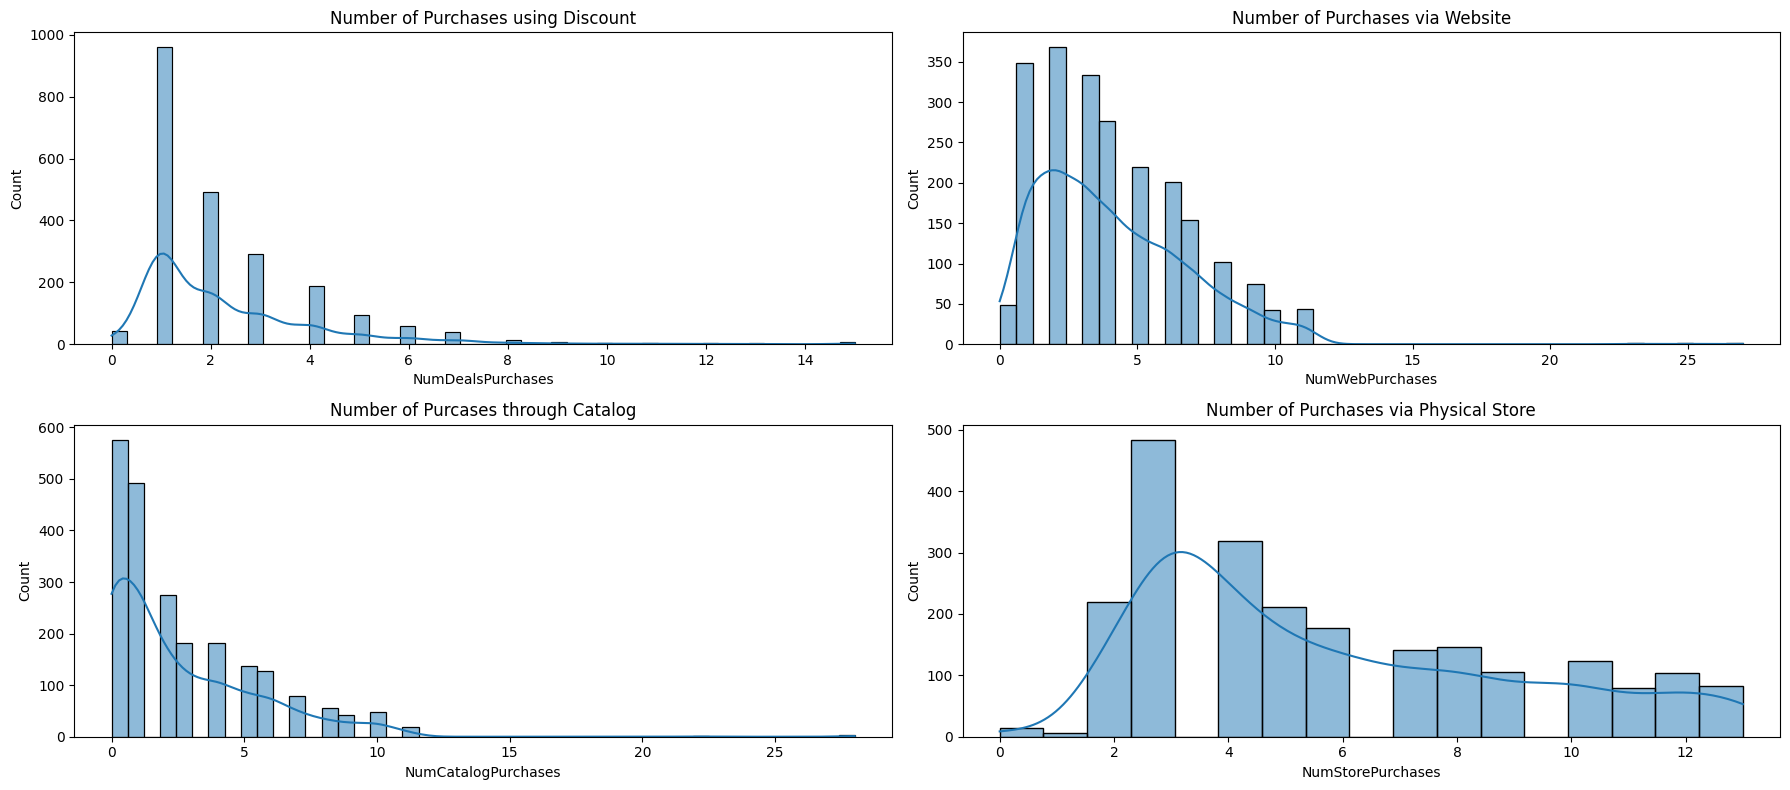

In [30]:
# DISPLAY 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases'

plt.figure(figsize=(18,8))

plt.subplot(2,2,1)
sns.histplot(data= numeric_data, x='NumDealsPurchases', kde=True)
plt.title('Number of Purchases using Discount')

plt.subplot(2,2,2)
sns.histplot(data= numeric_data, x='NumWebPurchases', kde=True)
plt.title('Number of Purchases via Website')

plt.subplot(2,2,3)
sns.histplot(data= numeric_data, x='NumCatalogPurchases', kde=True)
plt.title('Number of Purcases through Catalog')

plt.subplot(2,2,4)
sns.histplot(data= numeric_data, x='NumStorePurchases', kde=True)
plt.title('Number of Purchases via Physical Store')

plt.tight_layout()
plt.show()

In [31]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

C:\Users\aliff\AppData\Local\Temp\ipykernel_3292\1500440720.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




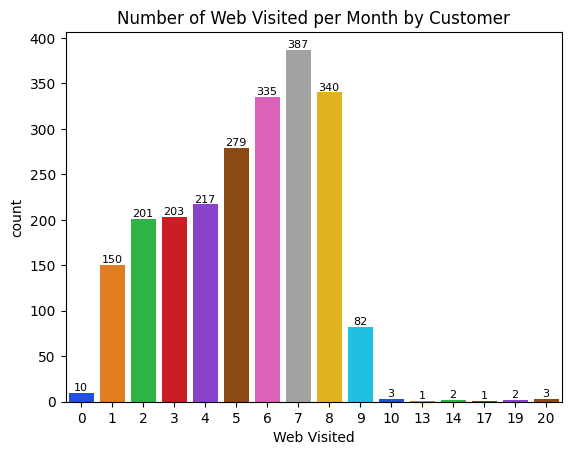

In [32]:
# DISPLAY NumWebVisitsMonth Histogram

axes = sns.countplot(data= numeric_data, x= 'NumWebVisitsMonth', palette='bright')

for ax in axes.patches:
    axes.text(x= ax.get_x() + ax.get_width() / 2, y= ax.get_height(), s= int(ax.get_height()), ha='center', va='bottom', fontsize=8)
plt.title('Number of Web Visited per Month by Customer')
plt.xlabel('Web Visited')
plt.show()

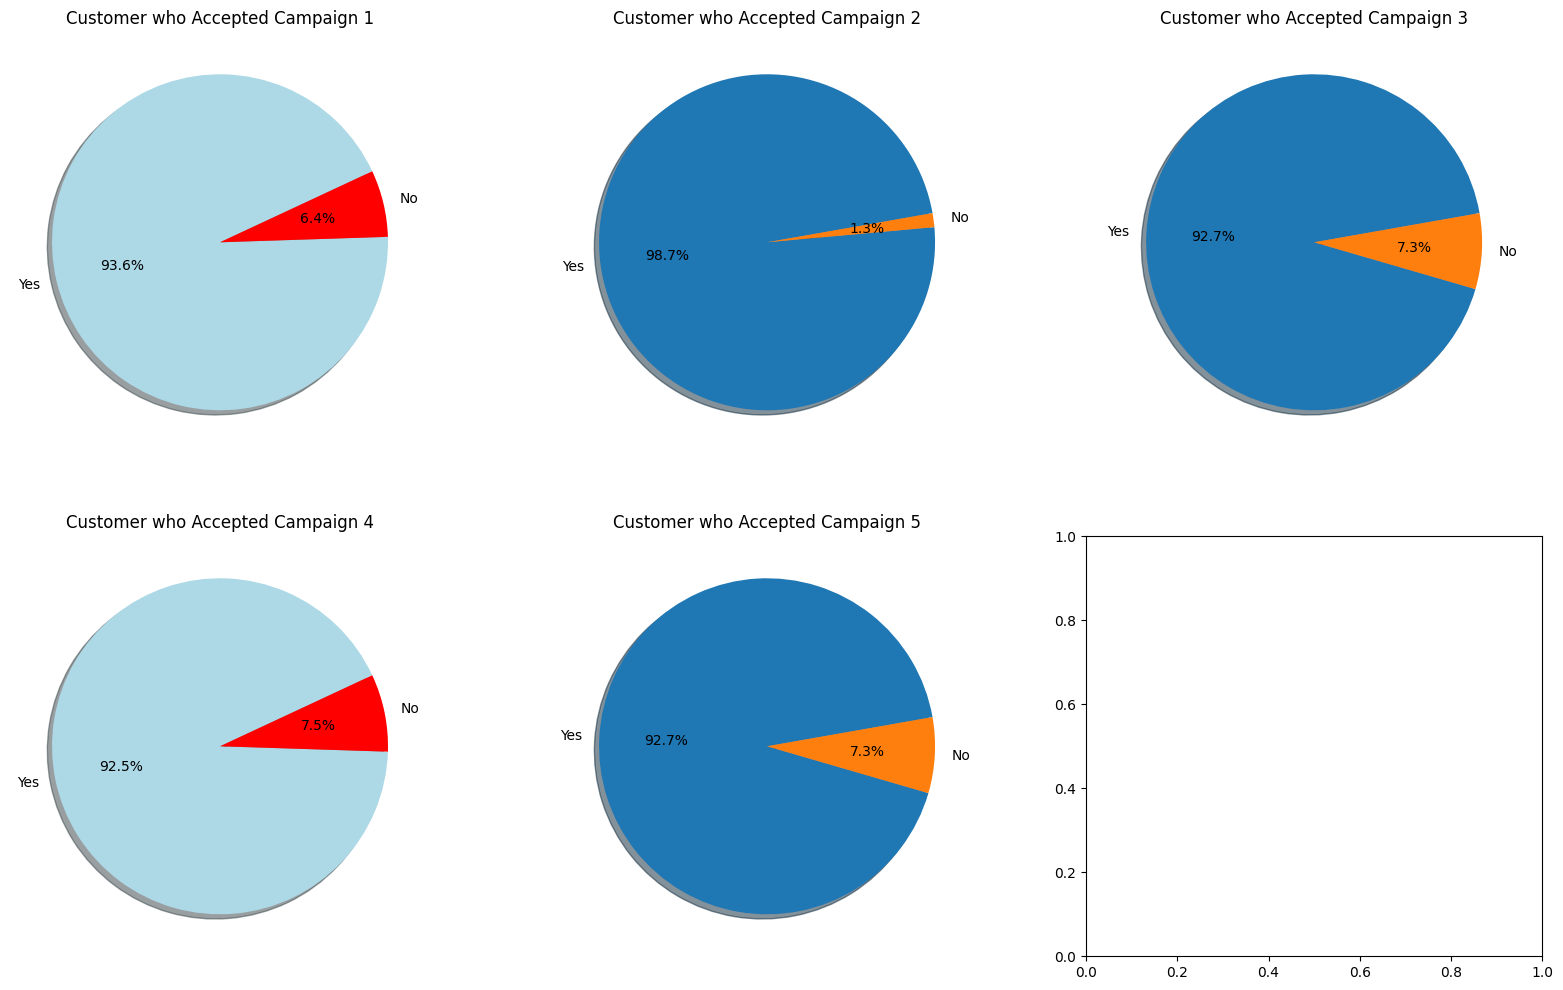

In [33]:
# DISPLAY 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5','AcceptedCmp1', 'AcceptedCmp2'

fig, axes = plt.subplots(nrows= 2, ncols=3, figsize=(20,12))

axes[0,0].pie(data['AcceptedCmp1'].value_counts(), labels=['Yes','No'], autopct='%1.1f%%',startangle=25, shadow=True, colors=['lightblue','red'])
axes[0,0].set_title('Customer who Accepted Campaign 1')

axes[0,1].pie(data['AcceptedCmp2'].value_counts(), labels=['Yes','No'], autopct='%1.1f%%', startangle=10, shadow=True)
axes[0,1].set_title('Customer who Accepted Campaign 2')

axes[0,2].pie(data['AcceptedCmp3'].value_counts(), labels=['Yes','No'], autopct='%1.1f%%', startangle=10, shadow=True)
axes[0,2].set_title('Customer who Accepted Campaign 3')

axes[1,0].pie(data['AcceptedCmp4'].value_counts(), labels=['Yes','No'], autopct='%1.1f%%',startangle=25, shadow=True, colors=['lightblue','red'])
axes[1,0].set_title('Customer who Accepted Campaign 4')

axes[1,1].pie(data['AcceptedCmp5'].value_counts(), labels=['Yes','No'], autopct='%1.1f%%', startangle=10, shadow=True)
axes[1,1].set_title('Customer who Accepted Campaign 5')

axes[1,2] = None

Text(0.5, 1.0, 'Customer that Response to the Campaign')

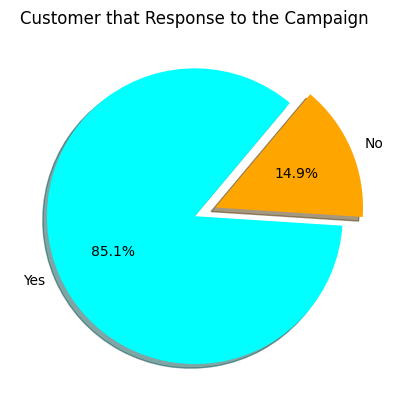

In [34]:
# DISPLAY RESPONSE CUSTOMER

plt.pie(data.Response.value_counts(), autopct='%1.1f%%', shadow=True, explode=[0,0.15], startangle= 50, colors=['cyan','orange'], labels=['Yes','No'])
plt.title('Customer that Response to the Campaign')

<h5>85% Customer Accept the Campaign

C:\Users\aliff\AppData\Local\Temp\ipykernel_3292\156700264.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




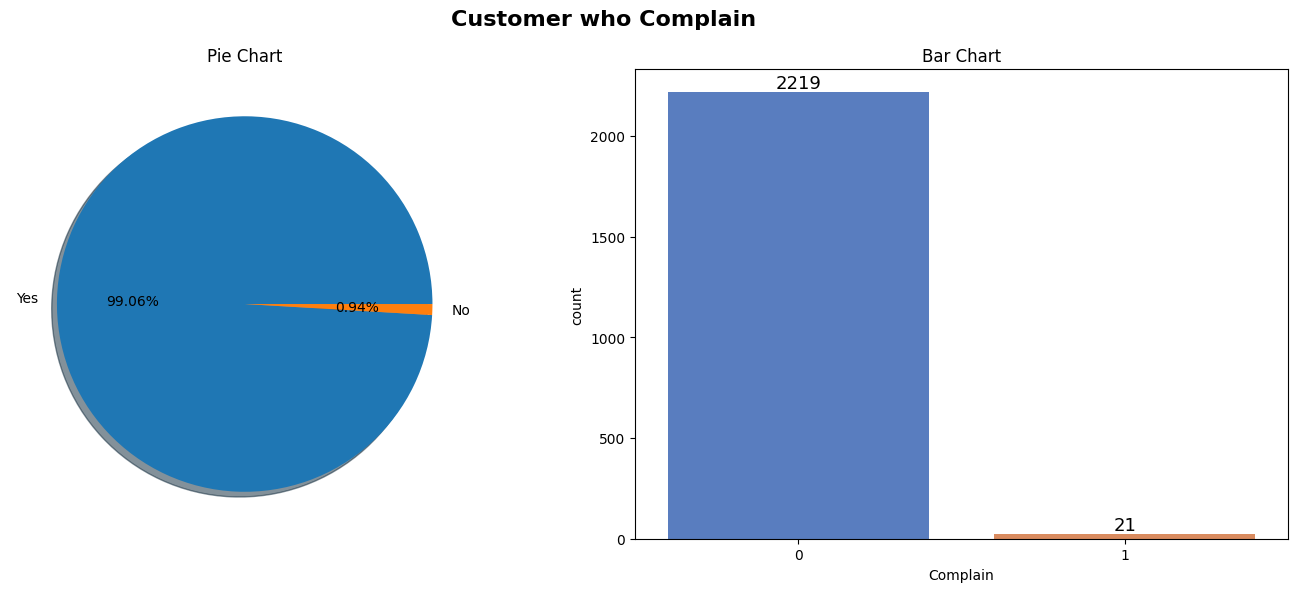

In [35]:
# CUSTOMER WHO COMPLAIN

plt.figure(figsize=(14,6))

# SHOW PIE CHART
plt.subplot(1,2,1)
plt.pie(x = data['Complain'].value_counts(), labels=['Yes','No'], autopct='%1.2f%%', shadow=True)
plt.title('Pie Chart')

# SHOW BAR CHART
plt.subplot(1,2,2)
axes = sns.countplot(data= data, x='Complain', palette='muted', legend='auto')
plt.title('Bar Chart')

for ax in axes.patches:
    axes.text(x= ax.get_x() + ax.get_width() / 2, y= ax.get_height(), s= int(ax.get_height()), ha='center', va='bottom', fontsize=13)

plt.suptitle('Customer who Complain',fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Data Preprocessing

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang perlu dilakukan, namun **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

## Label Encoder

In [36]:
# CONVERT EDUCATION AND MARITAL STATUS USING LABEL ENCODER

encoder = LabelEncoder()
data_clean['Education'] = encoder.fit_transform(data_clean['Education'])
data_clean['Marital_Status'] = encoder.fit_transform(data_clean['Marital_Status'])

data_clean.head(4)

C:\Users\aliff\AppData\Local\Temp\ipykernel_3292\3392822965.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\aliff\AppData\Local\Temp\ipykernel_3292\3392822965.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



ID  Year_Birth  Education  Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957          2               4  58138.0        0         0   
1  2174        1954          2               4  46344.0        1         1   
2  4141        1965          2               5  71613.0        0         0   
3  6182        1984          2               5  26646.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  04-09-2012       58       635         88              546              172   
1  08-03-2014       38        11          1                6                2   
2  21-08-2013       26       426         49              127              111   
3  10-02-2014       26        11          4               20               10   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0

## Feature Engineering

In [37]:
# ADD NEW 'AGE' FEATURE and 'Total items Purchases' Feature

# DECLARE CURRENT YEAR
current_year = datetime.now().year

data_clean['Age'] = current_year - data_clean['Year_Birth']
data_clean['Total_Items_Purchases'] = data_clean['MntWines'] + data_clean['MntFruits'] + data_clean['MntMeatProducts'] + data_clean['MntFishProducts'] + data_clean['MntSweetProducts'] + data_clean['MntGoldProds']

data_clean.head(4)

C:\Users\aliff\AppData\Local\Temp\ipykernel_3292\35066346.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\aliff\AppData\Local\Temp\ipykernel_3292\35066346.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



ID  Year_Birth  Education  Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957          2               4  58138.0        0         0   
1  2174        1954          2               4  46344.0        1         1   
2  4141        1965          2               5  71613.0        0         0   
3  6182        1984          2               5  26646.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  04-09-2012       58       635         88              546              172   
1  08-03-2014       38        11          1                6                2   
2  21-08-2013       26       426         49              127              111   
3  10-02-2014       26        11          4               20               10   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  Age  Total_Items_Purchases  
0              3         11         1   68                   1617  
1              3         11         0   71                     27  
2              3         11         0   60                    776  
3              3         11         0   41                     53

## Feature Selection

In [38]:

#CHOOSE COLUMNS TO CLUSTER
cols_to_cluster = ['Income','Age','Education','Marital_Status','Kidhome','Teenhome','Recency','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','Total_Items_Purchases','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases']

data_cluster = data_clean[cols_to_cluster]

data_cluster

Income  Age  Education  Marital_Status  Kidhome  Teenhome  Recency  \
0     58138.0   68          2               4        0         0       58   
1     46344.0   71          2               4        1         1       38   
2     71613.0   60          2               5        0         0       26   
3     26646.0   41          2               5        1         0       26   
4     58293.0   44          4               3        1         0       94   
...       ...  ...        ...             ...      ...       ...      ...   
2235  61223.0   58          2               3        0         1       46   
2236  64014.0   79          4               5        2         1       56   
2237  56981.0   44          2               2        0         0       91   
2238  69245.0   69          3               5        0         1        8   
2239  52869.0   71          4               3        1         1       40   

      MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0          635         88              546              172                88   
1           11          1                6                2                 1   
2          426         49              127              111                21   
3           11          4               20               10                 3   
4          173         43              118               46                27   
...        ...        ...              ...              ...               ...   
2235       709         43              182               42               118   
2236       406          0               30                0                 0   
2237       908         48              217               32                12   
2238       428         30              214               80                30   
2239        84          3               61                2                 1   

      MntGoldProds  Total_Items_Purchases  NumDealsPurchases  NumWebPurchases  \
0               88                   1617                  3                8   
1                6                     27                  2                1   
2               42                    776                  1                8   
3                5                     53                  2                2   
4               15                    422                  5                5   
...            ...                    ...                ...              ...   
2235           247                   1341                  2                9   
2236             8                    444                  7                8   
2237            24                   1241                  1                2   
2238            61                    843                  2                6   
2239            21                    172                  3                3   

      NumCatalogPurchases  NumStorePurchases  
0                      10                  4  
1                       1                  2  
2                       2                 10  
3                       0                  4  
4                       3                  6  
...                   ...                ...  
2235                    3                  4  
2236                    2                  5  
2237                    3                 13  
2238                    5                 10  
2239                    1                  4  

[2208 rows x 18 columns]

<h5> FEATURE THAT I CHOOSE TO CLUSTER:</h5>
<ul>
    <li><strong>Income </strong>: Customer income is one of the important factors in customer segmentation. Typically, customers with high income have different purchasing behavior compared to customers with lower income.</li><br>
    <li><strong>Age </strong>: Age can provide important insights into customer preferences and needs. For example, younger customers may be more likely to shop online, while older customers may prefer offline purchases or specific products. </li><br>
    <li><strong>Education </strong>: Education can be related to product preferences or purchasing channels, as education levels are often associated with different incomes or consumption patterns. </li><br>
    <li><strong>Marital_Status </strong>: Marital status can influence purchasing patterns, especially in the context of products that are more related to the family or individual. For example, customers who are married or have a partner may purchase products with a higher value or shop more often for the family.</li><br>
    <li><strong>Kidhome, Teenhome </strong>: The number of children in the household can be an important indicator in determining customer segments. For example, customers with children tend to buy different products than customers without children. </li><br>
    <li><strong>Recency </strong>: This column measures how recently a customer’s last interaction or purchase was with a company. This is important for understanding how active or engaged the customer is. Customers with high recency tend to be “warmer” or more ready to engage or purchase again, while those with low recency may have been out of touch for longer and may have lost interest. </li><br>
    <li><strong>MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds , Total_Items_Purchases</strong>: These columns show how much customers spend on different product categories. This is very useful for identifying customer consumption behavior and product preferences. </li><br>
    <li><strong>NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases </strong>: This column shows the purchasing channels used by customers. Customers who shop more often online (NumWebPurchases) may have different preferences and habits than those who shop more often in physical stores (NumStorePurchases). </li><br>

## Feature Scaling

In [39]:
# 

# CHOOSE FEATURE TO NORMALIZE
cols_to_normalize = ['Income']

# FIT MODEL
robust = RobustScaler()
data_cluster[cols_to_normalize] = robust.fit_transform(data_cluster[cols_to_normalize])

data_cluster.head(5)

C:\Users\aliff\AppData\Local\Temp\ipykernel_3292\3048912752.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Income  Age  Education  Marital_Status  Kidhome  Teenhome  Recency  \
0  0.206595   68          2               4        0         0       58   
1 -0.149787   71          2               4        1         1       38   
2  0.613771   60          2               5        0         0       26   
3 -0.745005   41          2               5        1         0       26   
4  0.211279   44          4               3        1         0       94   

   MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0       635         88              546              172                88   
1        11          1                6                2                 1   
2       426         49              127              111                21   
3        11          4               20               10                 3   
4       173         43              118               46                27   

   MntGoldProds  Total_Items_Purchases  NumDealsPurchases  NumWebPurchases  \
0            88                   1617                  3                8   
1             6                     27                  2                1   
2            42                    776                  1                8   
3             5                     53                  2                2   
4            15                    422                  5                5   

   NumCatalogPurchases  NumStorePurchases  
0                   10                  4  
1                    1                  2  
2                    2                 10  
3                    0                  4  
4                    3                  6

In [40]:
data_cluster['Income'].describe()

count    2208.000000
mean        0.010051
std         0.625900
min        -1.497896
25%        -0.486648
50%         0.000000
75%         0.513352
max         1.886550
Name: Income, dtype: float64

## Check Correlation

<Axes: >

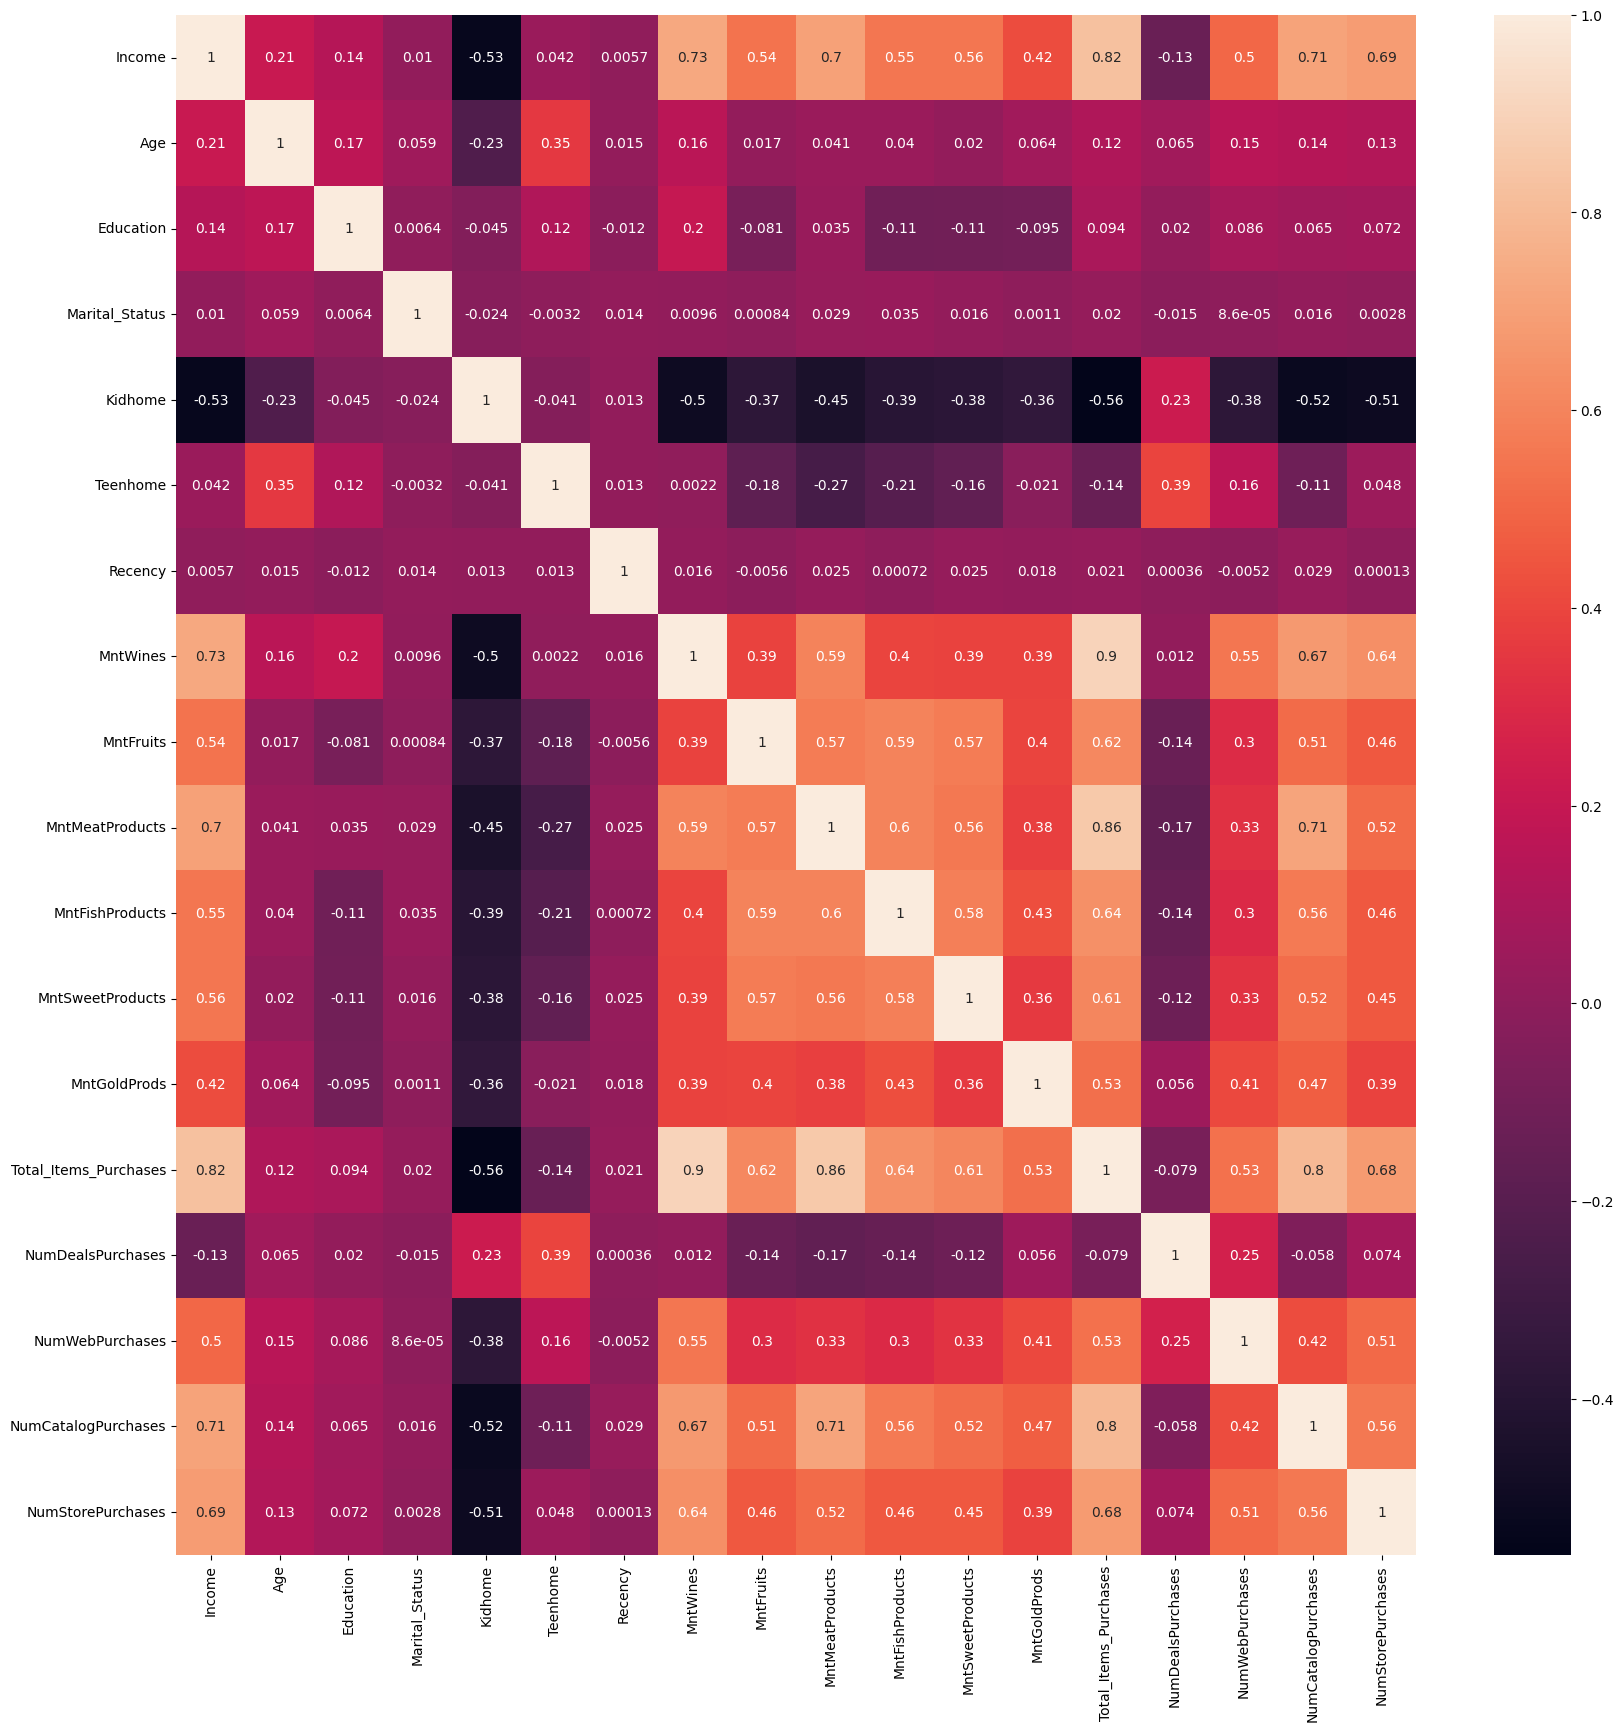

In [41]:
# CORRELATION

data_corr = data_cluster.corr('pearson')

plt.figure(figsize=(20,20))
sns.heatmap(data= data_corr, annot=True)

Check relationship between customer income and Products Purchases

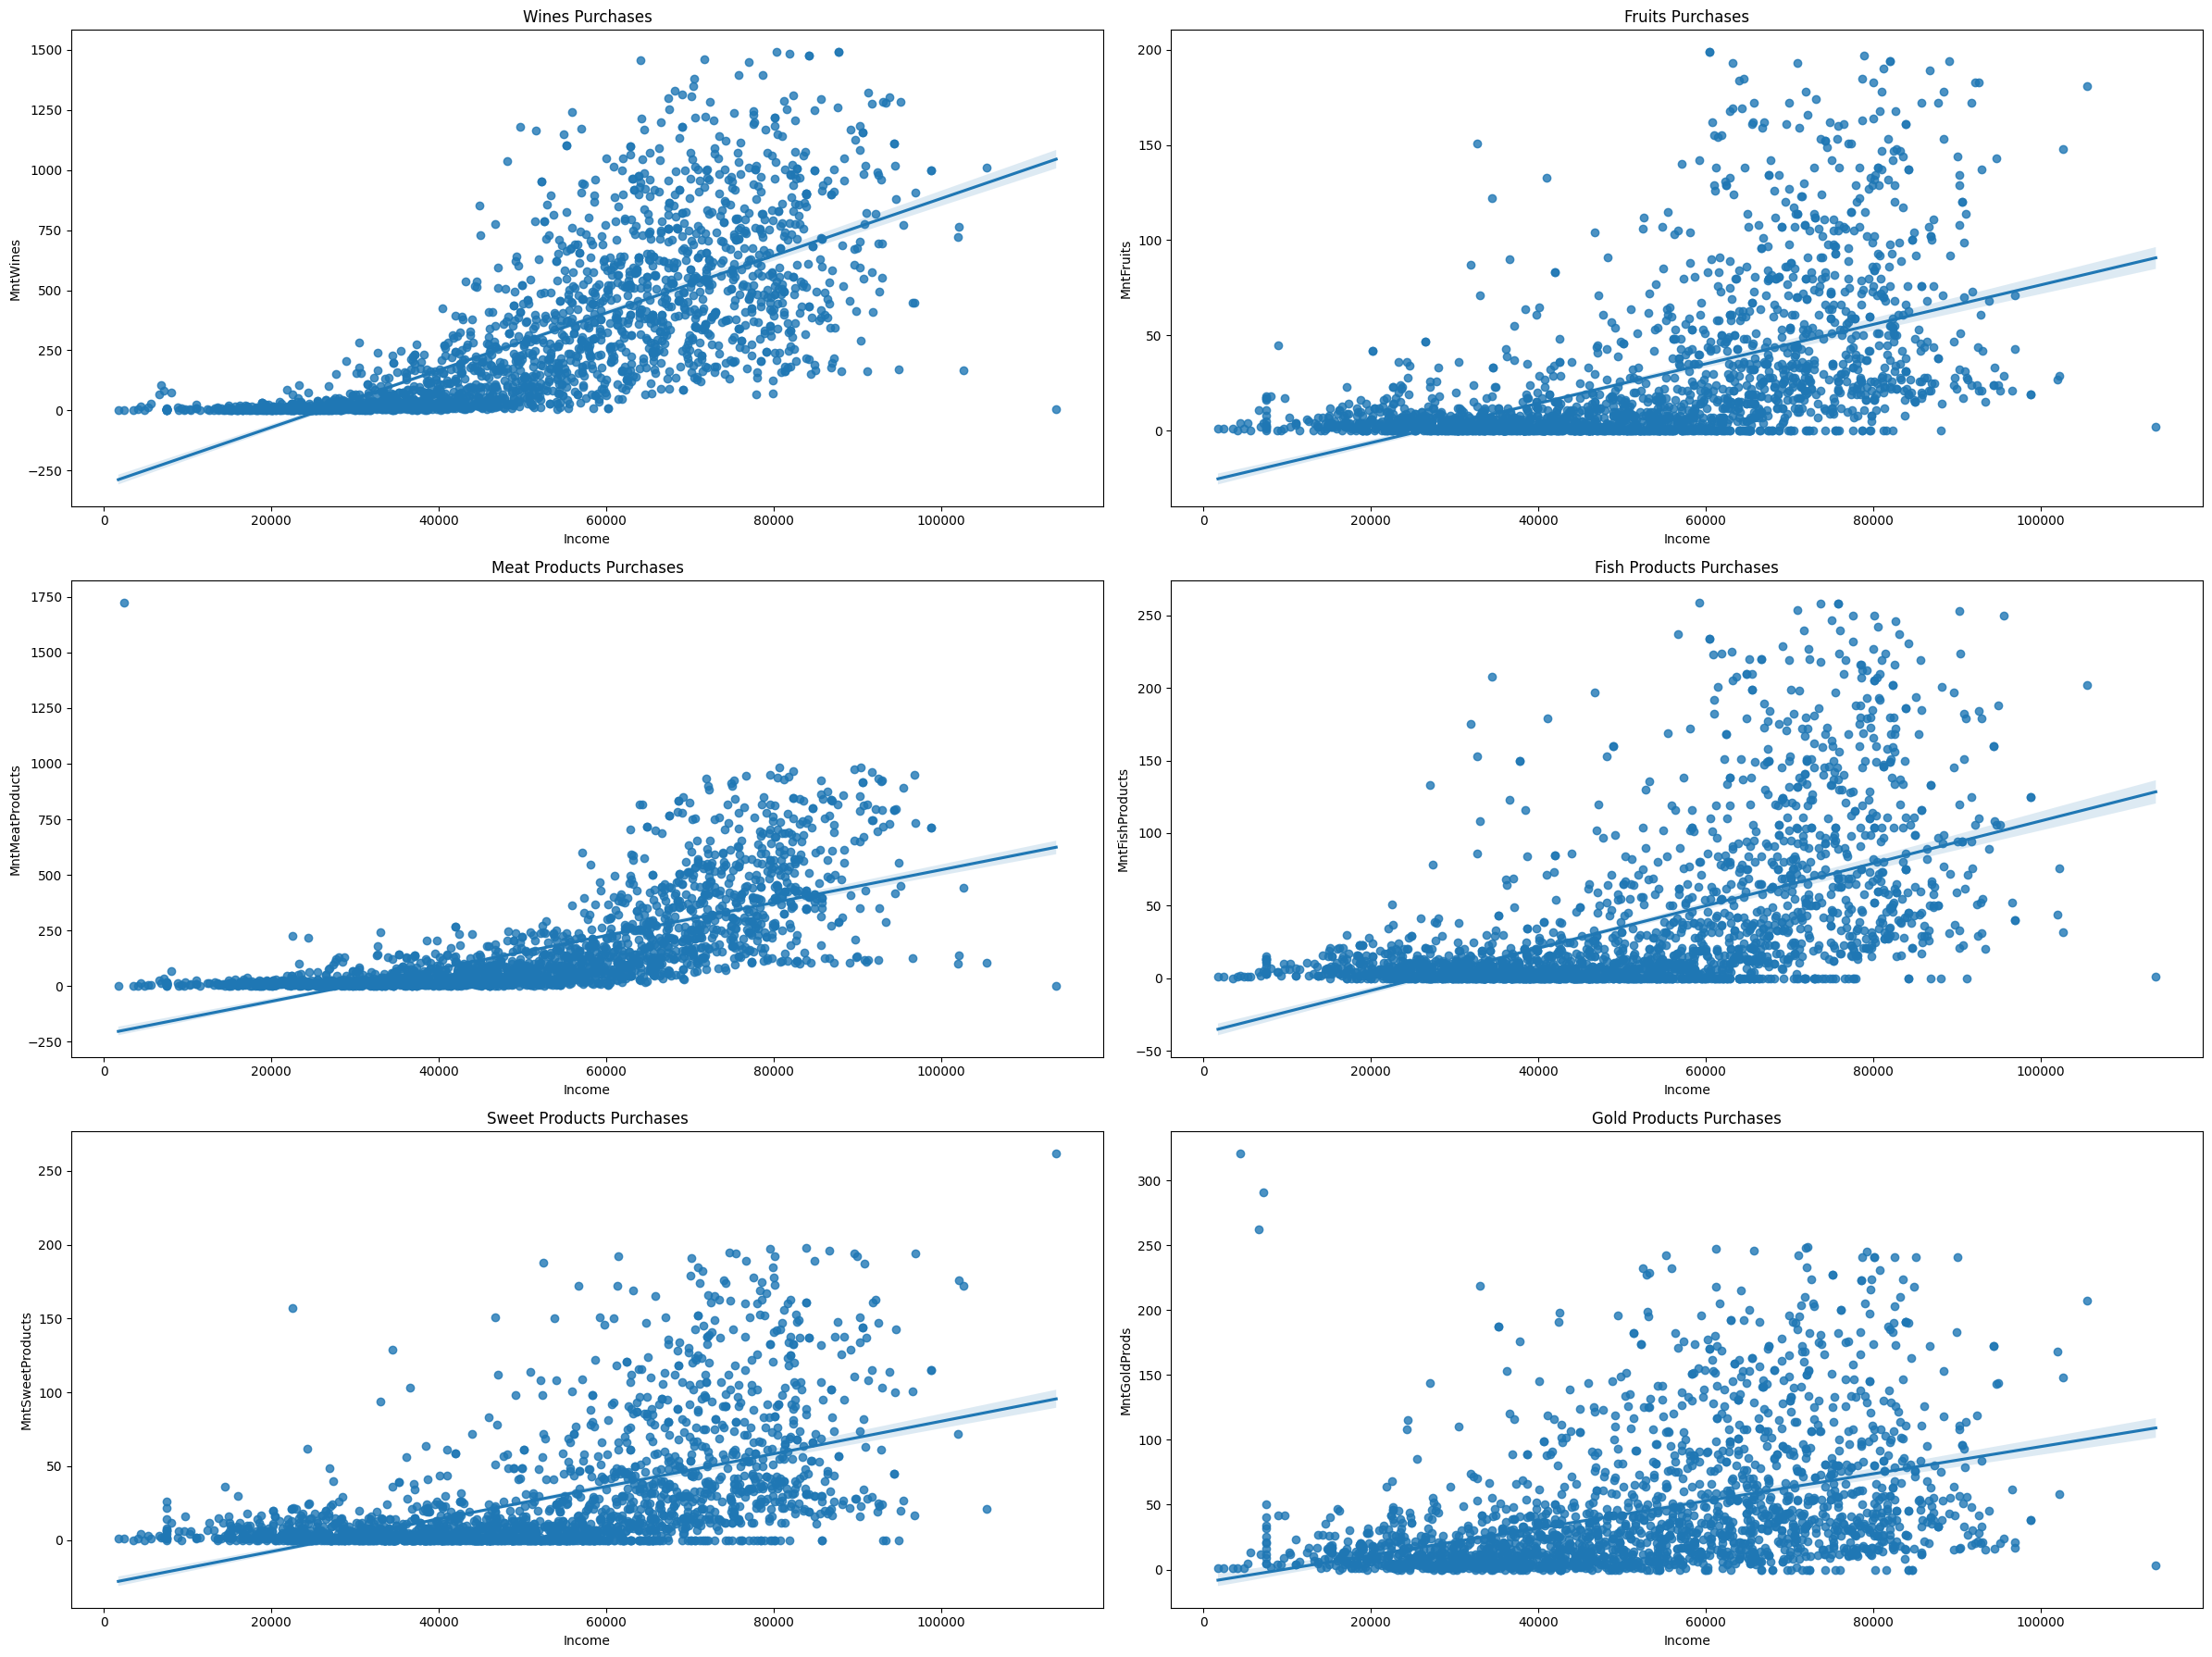

In [42]:

fig, axes = plt.subplots(nrows=3, ncols= 2,figsize=(24,18))

# Membuat lmplot
sns.regplot(data=data_clean, x='Income', y='MntWines', ax=axes[0,0])
axes[0,0].set_title('Wines Purchases')

sns.regplot(data=data_clean, x='Income', y='MntFruits', ax=axes[0,1])
axes[0,1].set_title('Fruits Purchases')

sns.regplot(data=data_clean, x='Income', y='MntMeatProducts', ax=axes[1,0])
axes[1,0].set_title('Meat Products Purchases')

sns.regplot(data=data_clean, x='Income', y='MntFishProducts', ax=axes[1,1])
axes[1,1].set_title('Fish Products Purchases')

sns.regplot(data=data_clean, x='Income', y='MntSweetProducts', ax=axes[2,0])
axes[2,0].set_title('Sweet Products Purchases')

sns.regplot(data=data_clean, x='Income', y='MntGoldProds', ax=axes[2,1])
axes[2,1].set_title('Gold Products Purchases')
plt.tight_layout()
plt.show()

<h5><strong>there is a moderate correlation between income and item purchases . This means that the higher a person's income, the more items they buy.

<h5><strong>CLUSTER MAP</strong>

c:\Users\aliff\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.

c:\Users\aliff\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.



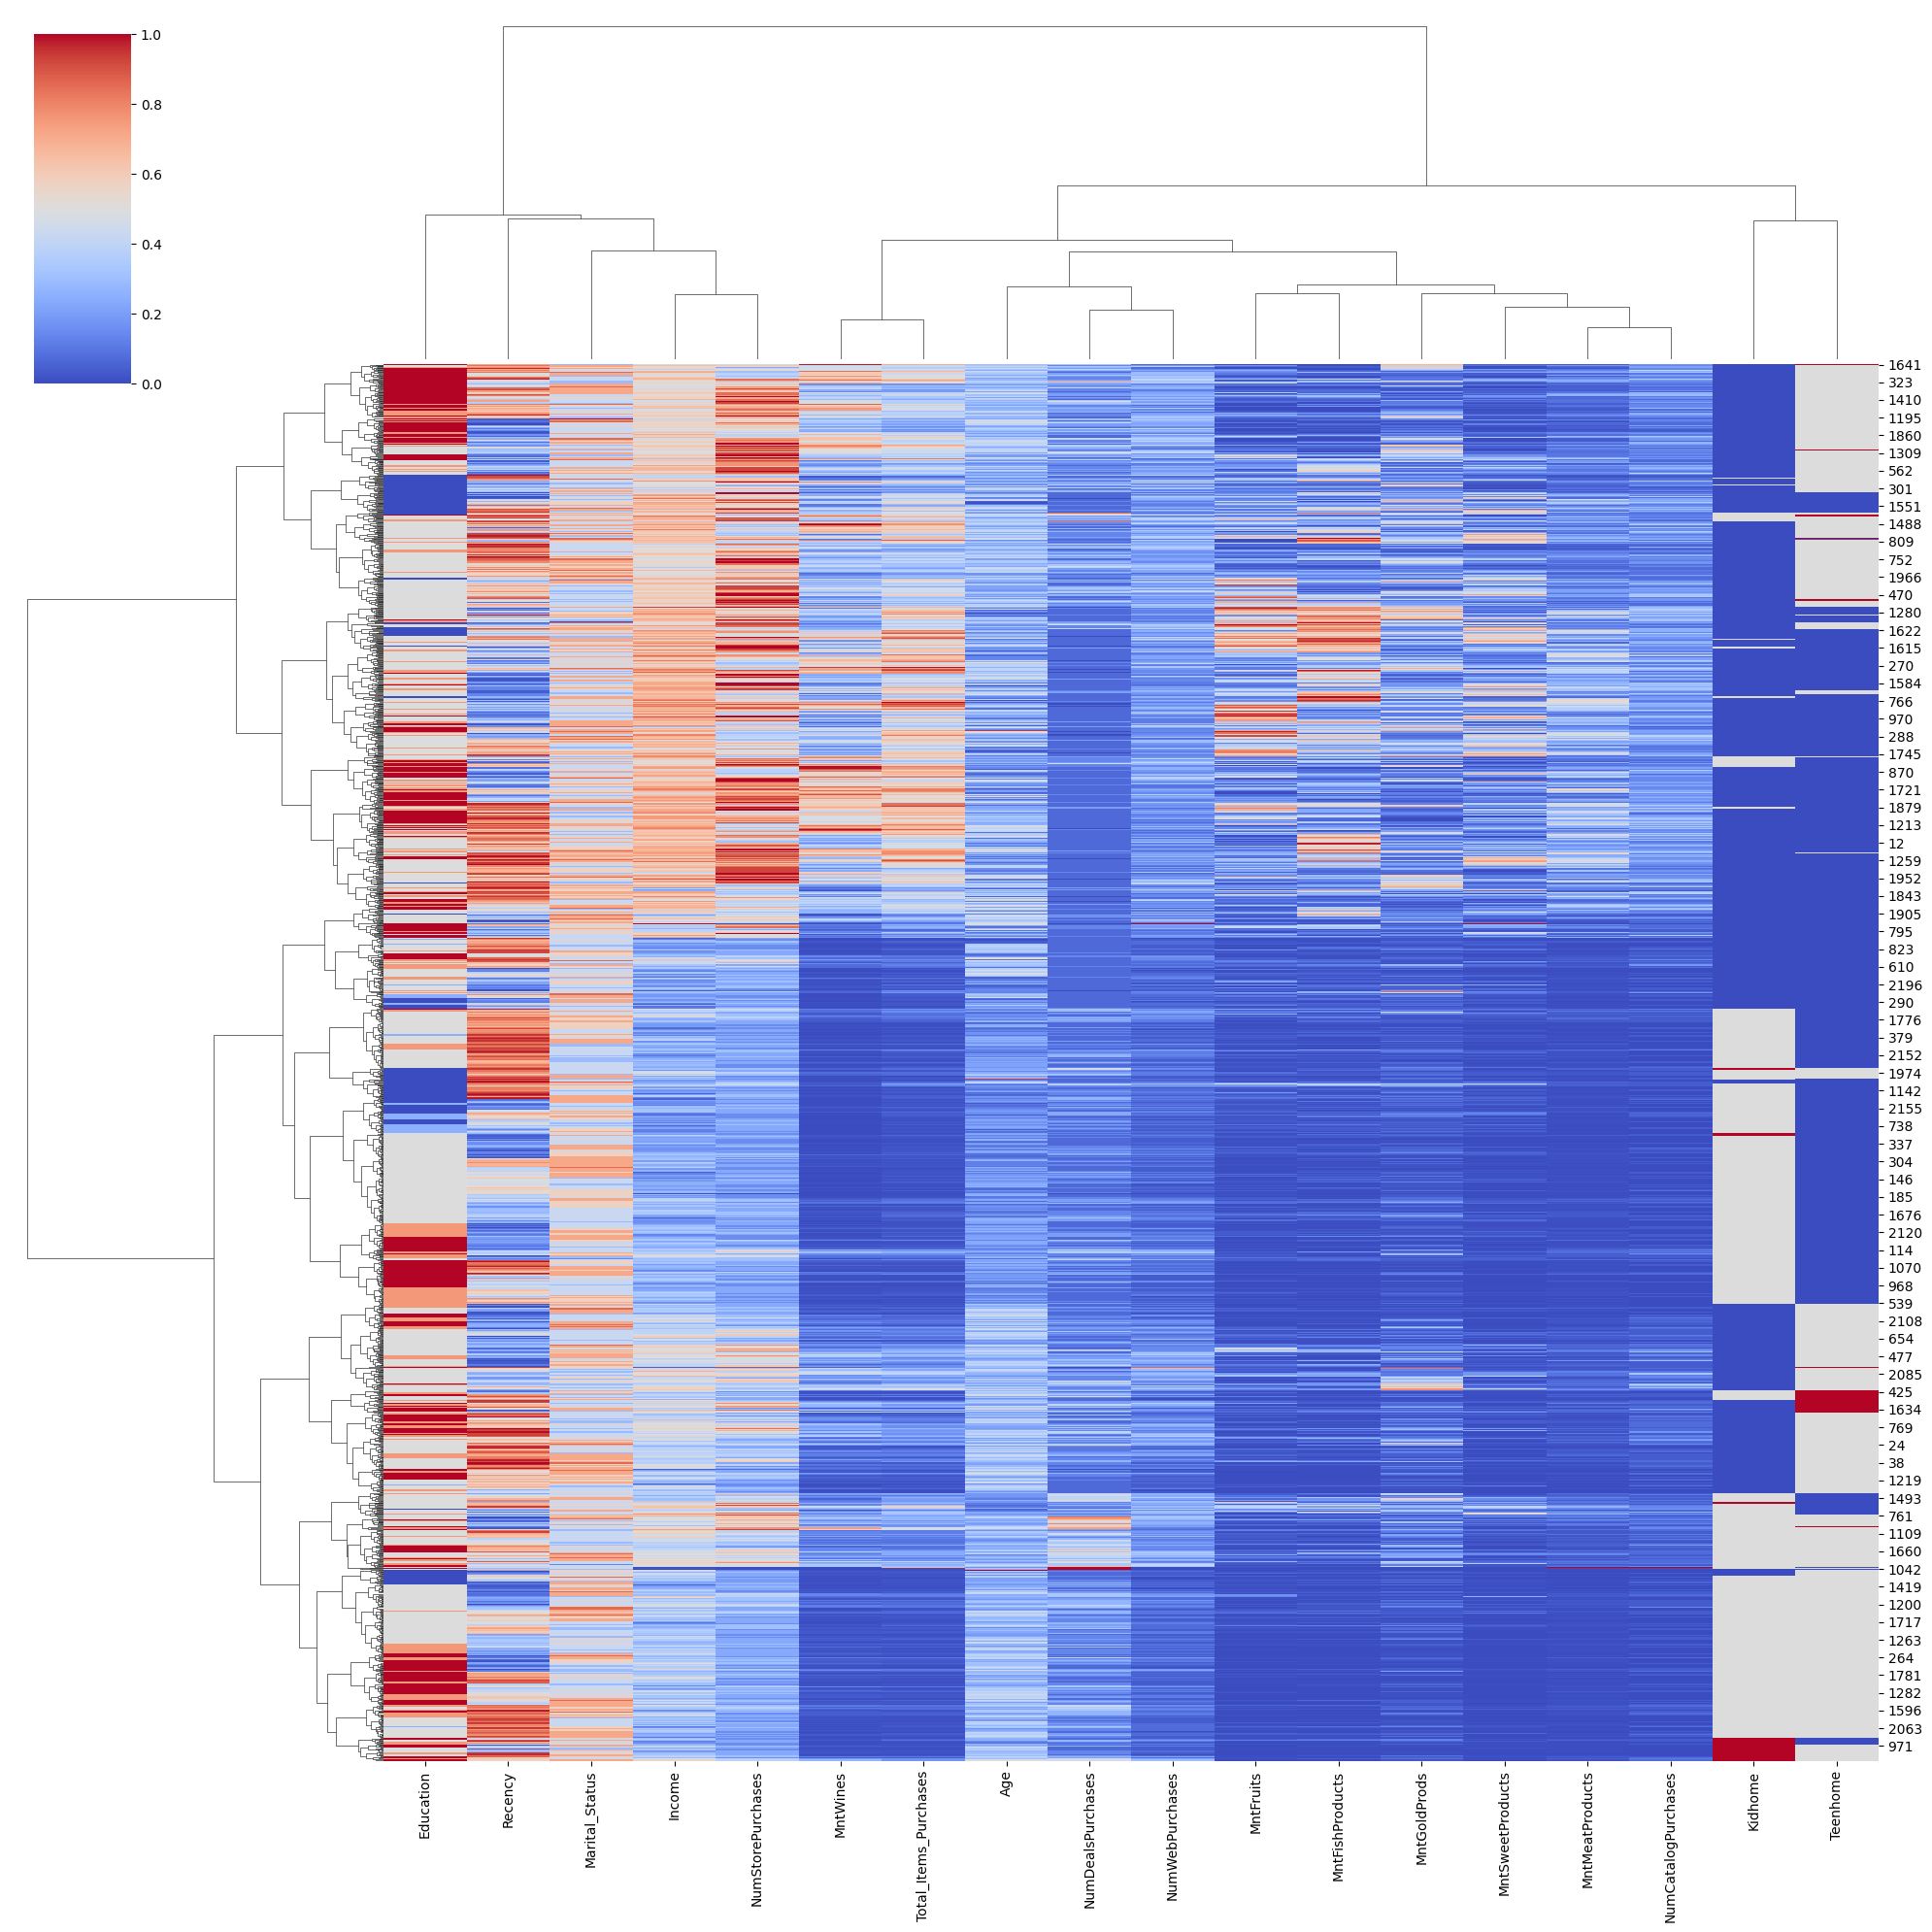

In [43]:
sns.clustermap(data=data_cluster, cmap='coolwarm', figsize=(20,20), standard_scale=1, metric='euclidean', method='ward')

## Dimension Reduction

In [44]:
# REDUCE DIMENSION

pca = PCA(n_components= None)

data_reduced = pca.fit_transform(data_cluster)

print(f'Number of Components : {pca.n_components_}\n')
print(f'Ratio every Component / PC : \n{pca.explained_variance_ratio_}\n')
print(f'PCA Components : \n{pca.components_}\n')
print(f'Eigen Value of Components : \n{pca.explained_variance_}\n')
print(f'Feature of Components : \n{pca.feature_names_in_}')

Number of Components : 18

Ratio every Component / PC : 
[9.25686791e-01 5.71431801e-02 9.15704367e-03 3.07316232e-03
 1.77640757e-03 1.57262590e-03 1.29412369e-03 2.61194016e-04
 1.24356307e-05 7.89126321e-06 5.14195038e-06 4.94489781e-06
 2.15973172e-06 2.05391774e-06 4.10655338e-07 2.81115974e-07
 1.52408020e-07 2.41801024e-32]

PCA Components : 
[[ 7.30191278e-04  2.08499415e-03  1.80488392e-04  2.98365795e-05
  -4.23531233e-04 -9.63807896e-05  8.62561153e-04  4.42320182e-01
   3.31484941e-02  2.60219178e-01  4.76881930e-02  3.39262762e-02
   3.74952790e-02  8.54797602e-01 -1.86204204e-04  2.09427769e-03
   3.14633978e-03  3.13936089e-03]
 [ 1.93635862e-04 -8.37491278e-03 -1.34931554e-03  1.43602237e-04
  -2.43669428e-05 -9.72813583e-04  1.82953959e-03 -7.39481652e-01
   7.37322277e-02  6.30638009e-01  1.11454548e-01  7.17531243e-02
   2.93802593e-02  1.77476517e-01 -2.20759547e-03 -2.80878221e-03
   2.06819696e-03 -1.02613145e-03]
 [-5.41311729e-04 -4.70379081e-04  3.74390963e-03 

<h5>The first principal component (PC1) explains the overwhelming majority (92.12%) of the variance in the data. PC2 explains 6.10%, and after that, the contributions drop even further. ok lets plot it on dataframe</h5>

In [45]:

highest_variance_PC = pca.components_[:3]

PC_df = pd.DataFrame(highest_variance_PC.T, index=data_cluster.columns, columns=['PC1','PC2','PC3']) 
PC_df = PC_df.sort_values(by=['PC1','PC2','PC3'], ascending=False)
PC_df

PC1       PC2       PC3
Total_Items_Purchases  0.854798  0.177477 -0.301969
MntWines               0.442320 -0.739482  0.333076
MntMeatProducts        0.260219  0.630638  0.613811
MntFishProducts        0.047688  0.111455 -0.377551
MntGoldProds           0.037495  0.029380 -0.420493
MntSweetProducts       0.033926  0.071753 -0.225943
MntFruits              0.033148  0.073732 -0.224870
NumCatalogPurchases    0.003146  0.002068 -0.003002
NumStorePurchases      0.003139 -0.001026 -0.006094
NumWebPurchases        0.002094 -0.002809 -0.006515
Age                    0.002085 -0.008375 -0.000470
Recency                0.000863  0.001830  0.005522
Income                 0.000730  0.000194 -0.000541
Education              0.000180 -0.001349  0.003744
Marital_Status         0.000030  0.000144  0.000087
Teenhome              -0.000096 -0.000973 -0.000263
NumDealsPurchases     -0.000186 -0.002208 -0.000888
Kidhome               -0.000424 -0.000024  0.000931

<h5><ol><li><strong>PC1 : 92.12%</strong>
<ul>
    <li>The first component (PC1) has the highest weight on the Total_Items Purchases variable with a value of 0.855084. MntWines (0.439485), MntMeatProducts (0.264177), dan MntFishProducts (0.047442)</li>
    <li>PC1 appears to reflect dimensions related to purchasing patterns, especially in terms of frequency or total purchases of larger items.</li>
</ul></li>
<li><strong>PC2 : 6.10% </strong>
<ul>
    <li>PC2 shows a significant contribution from the variable MntWines (-0.729632), which has a very high negative loading. This indicates that this variable has an inverse relationship with this component. MntMeatProducts (0.650785) has positive loading</li>
    <li>This shows that PC2 is more focused on purchasing patterns for certain, more specific products.</li>
</ul></li>
<li><strong>PC 3 : 0.9% </strong>
<ul>
    <li>It can be seen that variables with negative contributions such as MntGoldProds (-0.403708) and MntFishProducts (-0.388070) have large weights, indicating that PC3 is related to the purchase of certain goods such as jewelry and gold-related products, and smaller factors related to demographics.</li>



# Build Clustering

## Find K-Value optimal for K-Means Clustering

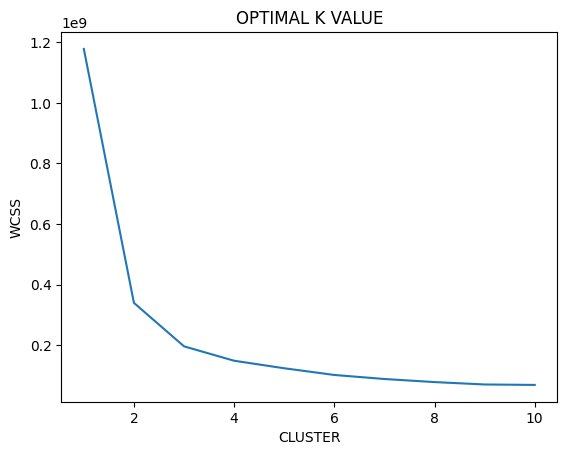

In [46]:
# FIND K-OPTIMAL WITH ELBOW METHOD

k_range = range(1,11)
inertia = []

for k in k_range:
    kmean = KMeans(n_clusters=k , init='k-means++', random_state=12)
    kmean.fit(data_reduced)  # FIT THE MODEL
    inertia.append(kmean.inertia_)  # GET THE COST FUNCTION

plt.plot(k_range, inertia)
plt.title('OPTIMAL K VALUE')
plt.xlabel('CLUSTER')
plt.ylabel('WCSS')
plt.show()

ok lets choose K = 3

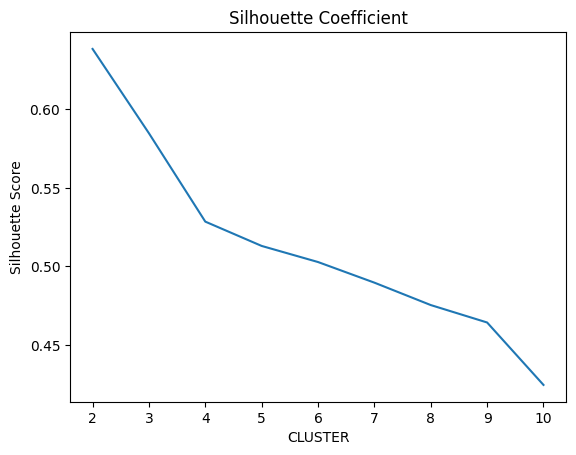

In [47]:
# CHECK HOW GOOD THE CLUSTER USING SILHOUETTE COEFFICIENT

k_range = range(2,11)
sil_scores = []

for k in k_range:
    kmean = KMeans(n_clusters=k, random_state=12, init='k-means++')
    kmean.fit(data_reduced)
    label = kmean.labels_
    sil_score = silhouette_score(X= data_reduced, labels=label, metric='euclidean')
    sil_scores.append(sil_score)

plt.plot(k_range, sil_scores)
plt.title('Silhouette Coefficient')
plt.xlabel('CLUSTER')
plt.ylabel('Silhouette Score')
plt.show()

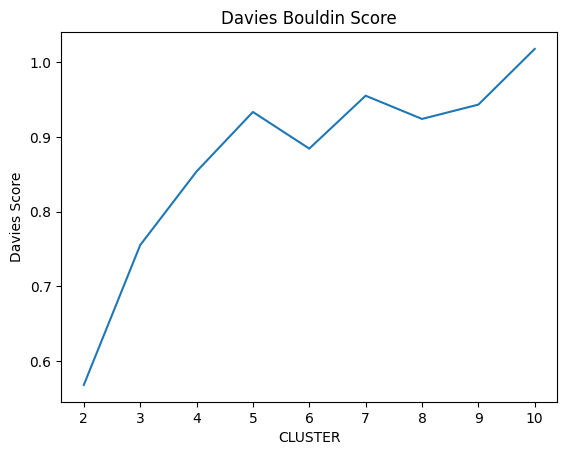

In [48]:
# DAVIES BOULDIN SCORE

k_range = range(2,11)
davies_score = []

for k in k_range:
    kmean = KMeans(n_clusters=k, init='k-means++', random_state=12)
    kmean.fit(X= data_reduced)
    davies = davies_bouldin_score(X= data_reduced, labels=kmean.labels_)
    davies_score.append(davies)

plt.plot(k_range, davies_score)
plt.title('Davies Bouldin Score')
plt.xlabel('CLUSTER')
plt.ylabel('Davies Score')
plt.show()

ok lets create K-means model with K = 3

In [49]:
# K-MEANS

fixed_kmean = KMeans(n_clusters=3, init='k-means++', random_state=12)
fixed_kmean.fit(data_reduced)

KMeans(n_clusters=3, random_state=12)

# Evaluation Cluster

In [50]:
# EVALUATION

wcss = fixed_kmean.inertia_
sil_coef = silhouette_score(X= data_reduced, labels=fixed_kmean.labels_)
davies_bouldin = davies_bouldin_score(X= data_reduced, labels= fixed_kmean.labels_)

print(f'WCSS Score : {wcss}')
print(f'Silhouette Coefficient Score : {sil_coef}')
print(f'Davies Bouldin Score : {davies_bouldin}')

WCSS Score : 196295135.05833957
Silhouette Coefficient Score : 0.5846878808405163
Davies Bouldin Score : 0.755223382303169


now lets Visualize it

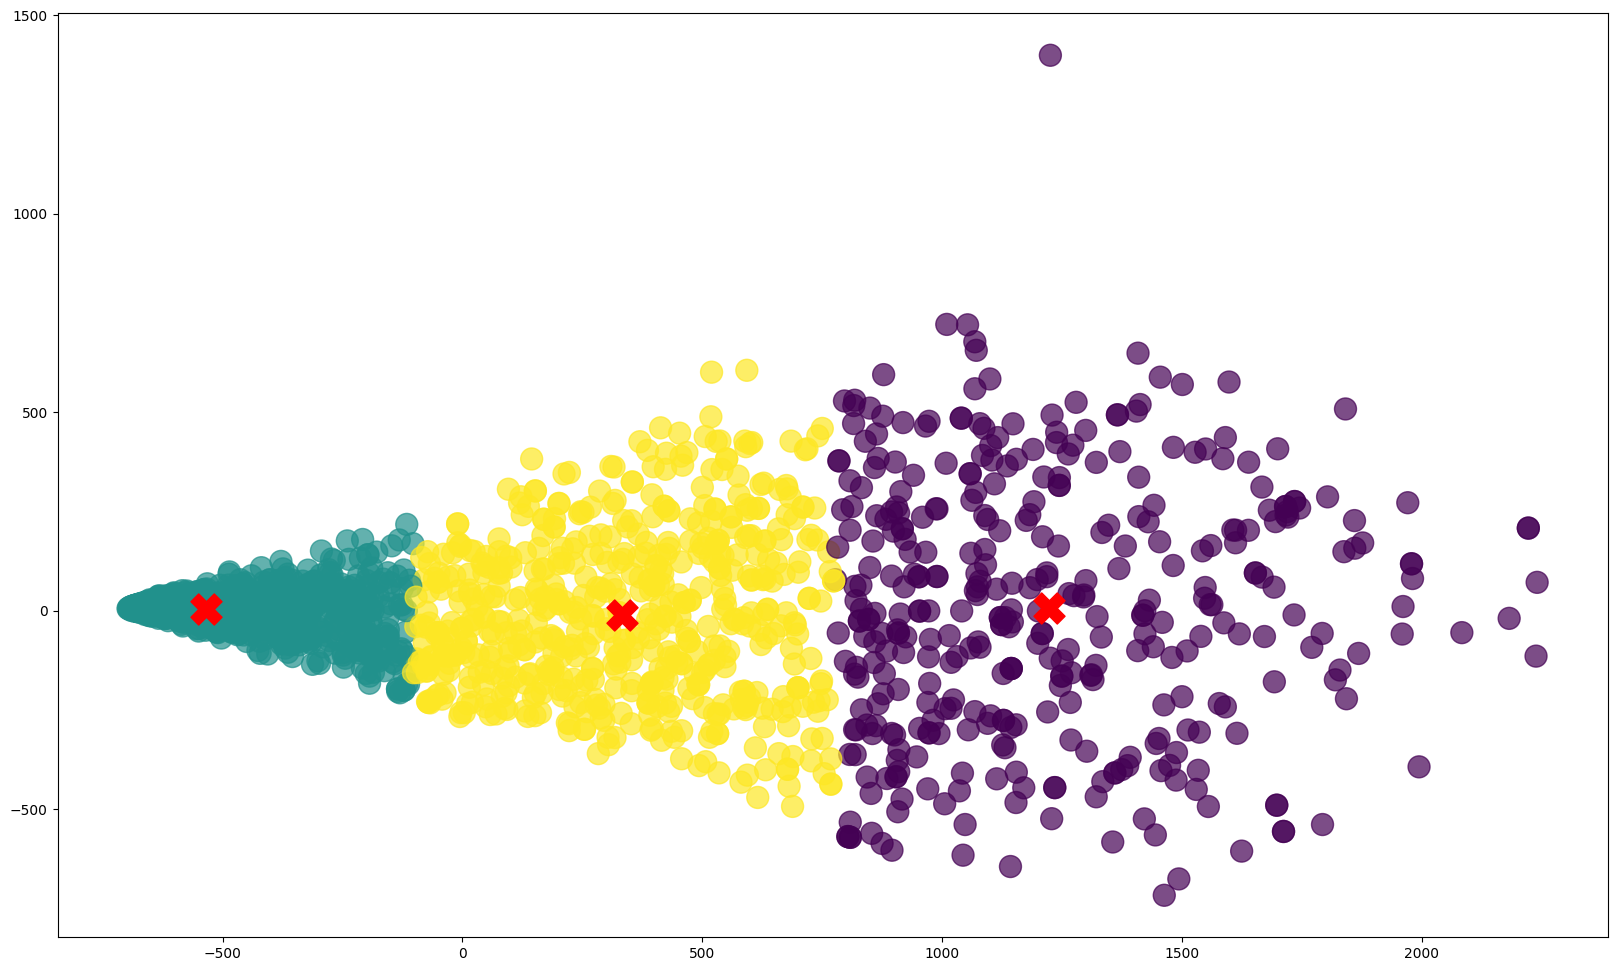

In [52]:
# VISUALIZE K-MEANS USING 2D SCATTER PLOT

centroids = fixed_kmean.cluster_centers_

# SCATTER PLOT
plt.figure(figsize=(20,12))
plt.scatter(x= data_reduced[:,0], y= data_reduced[:,1], c= fixed_kmean.labels_, cmap='viridis', s=250, alpha=0.7)
plt.scatter(x= centroids[:,0], y=centroids[:,1], c='red', marker='X', label='Centroid', s=500)

c:\Users\aliff\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\collections.py:963: RuntimeWarning:

invalid value encountered in sqrt



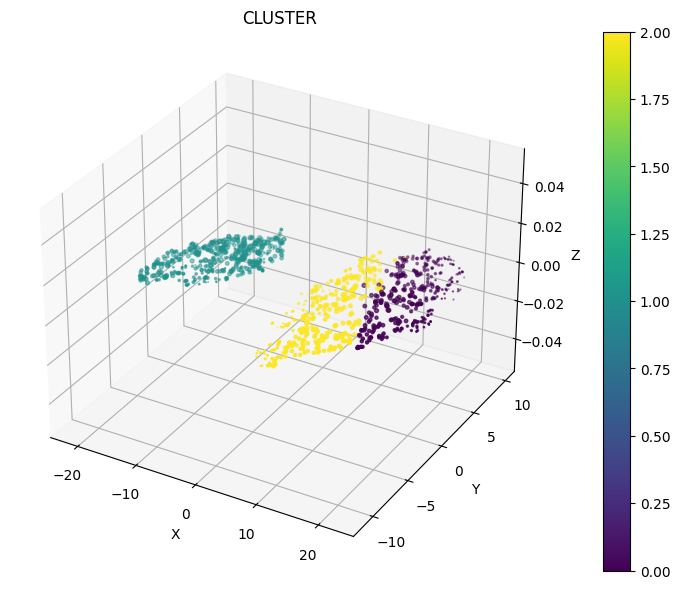

In [53]:
# VISUALIZE 3D SCATTER PLOT USING TSNE

tsne = TSNE(n_components=3)
tsne_data = tsne.fit_transform(data_reduced)

fig = plt.figure(figsize=(14,7))
ax = fig.add_subplot(1,1,1,projection='3d')

scatter = plt.scatter(x = tsne_data[:,0], y= tsne_data[:,1], s= tsne_data[:,2], c=fixed_kmean.labels_)

ax.set_title('CLUSTER')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

fig.colorbar(scatter)

plt.show()

In [54]:
# CREATE INTERACTIVE VISUAL 3D USING PLOTLY

fig = px.scatter_3d(x= data_reduced[:,0], y=data_reduced[:,1], z=data_reduced[:,2], color=fixed_kmean.labels_,
                    title='K-Mean Clustering',labels={'color' : 'Cluster'}, width=1000, height=600)
fig.update_traces(marker=dict(size=8))

fig.show()

In [55]:
# SAVE A K-MEAN CLUSTER TO DATAFRAME
data_kmean = pd.DataFrame(data= data_cluster, columns=data_cluster.columns)
prediction = fixed_kmean.predict(data_reduced)

#RETURN INCOME VALUE BACK TO THE NORMAL
data_kmean['Income'] = robust.inverse_transform(data_kmean[['Income']])

# ADD CLUSTER COLUMN TO DATAFRAME
data_kmean['Cluster'] = prediction + 1
data_kmean.head(5)

Income  Age  Education  Marital_Status  Kidhome  Teenhome  Recency  \
0  58138.0   68          2               4        0         0       58   
1  46344.0   71          2               4        1         1       38   
2  71613.0   60          2               5        0         0       26   
3  26646.0   41          2               5        1         0       26   
4  58293.0   44          4               3        1         0       94   

   MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0       635         88              546              172                88   
1        11          1                6                2                 1   
2       426         49              127              111                21   
3        11          4               20               10                 3   
4       173         43              118               46                27   

   MntGoldProds  Total_Items_Purchases  NumDealsPurchases  NumWebPurchases  \
0            88                   1617                  3                8   
1             6                     27                  2                1   
2            42                    776                  1                8   
3             5                     53                  2                2   
4            15                    422                  5                5   

   NumCatalogPurchases  NumStorePurchases  Cluster  
0                   10                  4        1  
1                    1                  2        2  
2                    2                 10        3  
3                    0                  4        2  
4                    3                  6        2

In [56]:
# DISPLAY THE NUMBER OF EACH CLUSTER
data_kmean.groupby('Cluster')['Age'].count()

Cluster
1     376
2    1232
3     600
Name: Age, dtype: int64

Cluster 2 has 1236 point, then cluster 3 has 600 points , and Cluster 0 has 379 points

ok lets try some visualize

<Axes: >

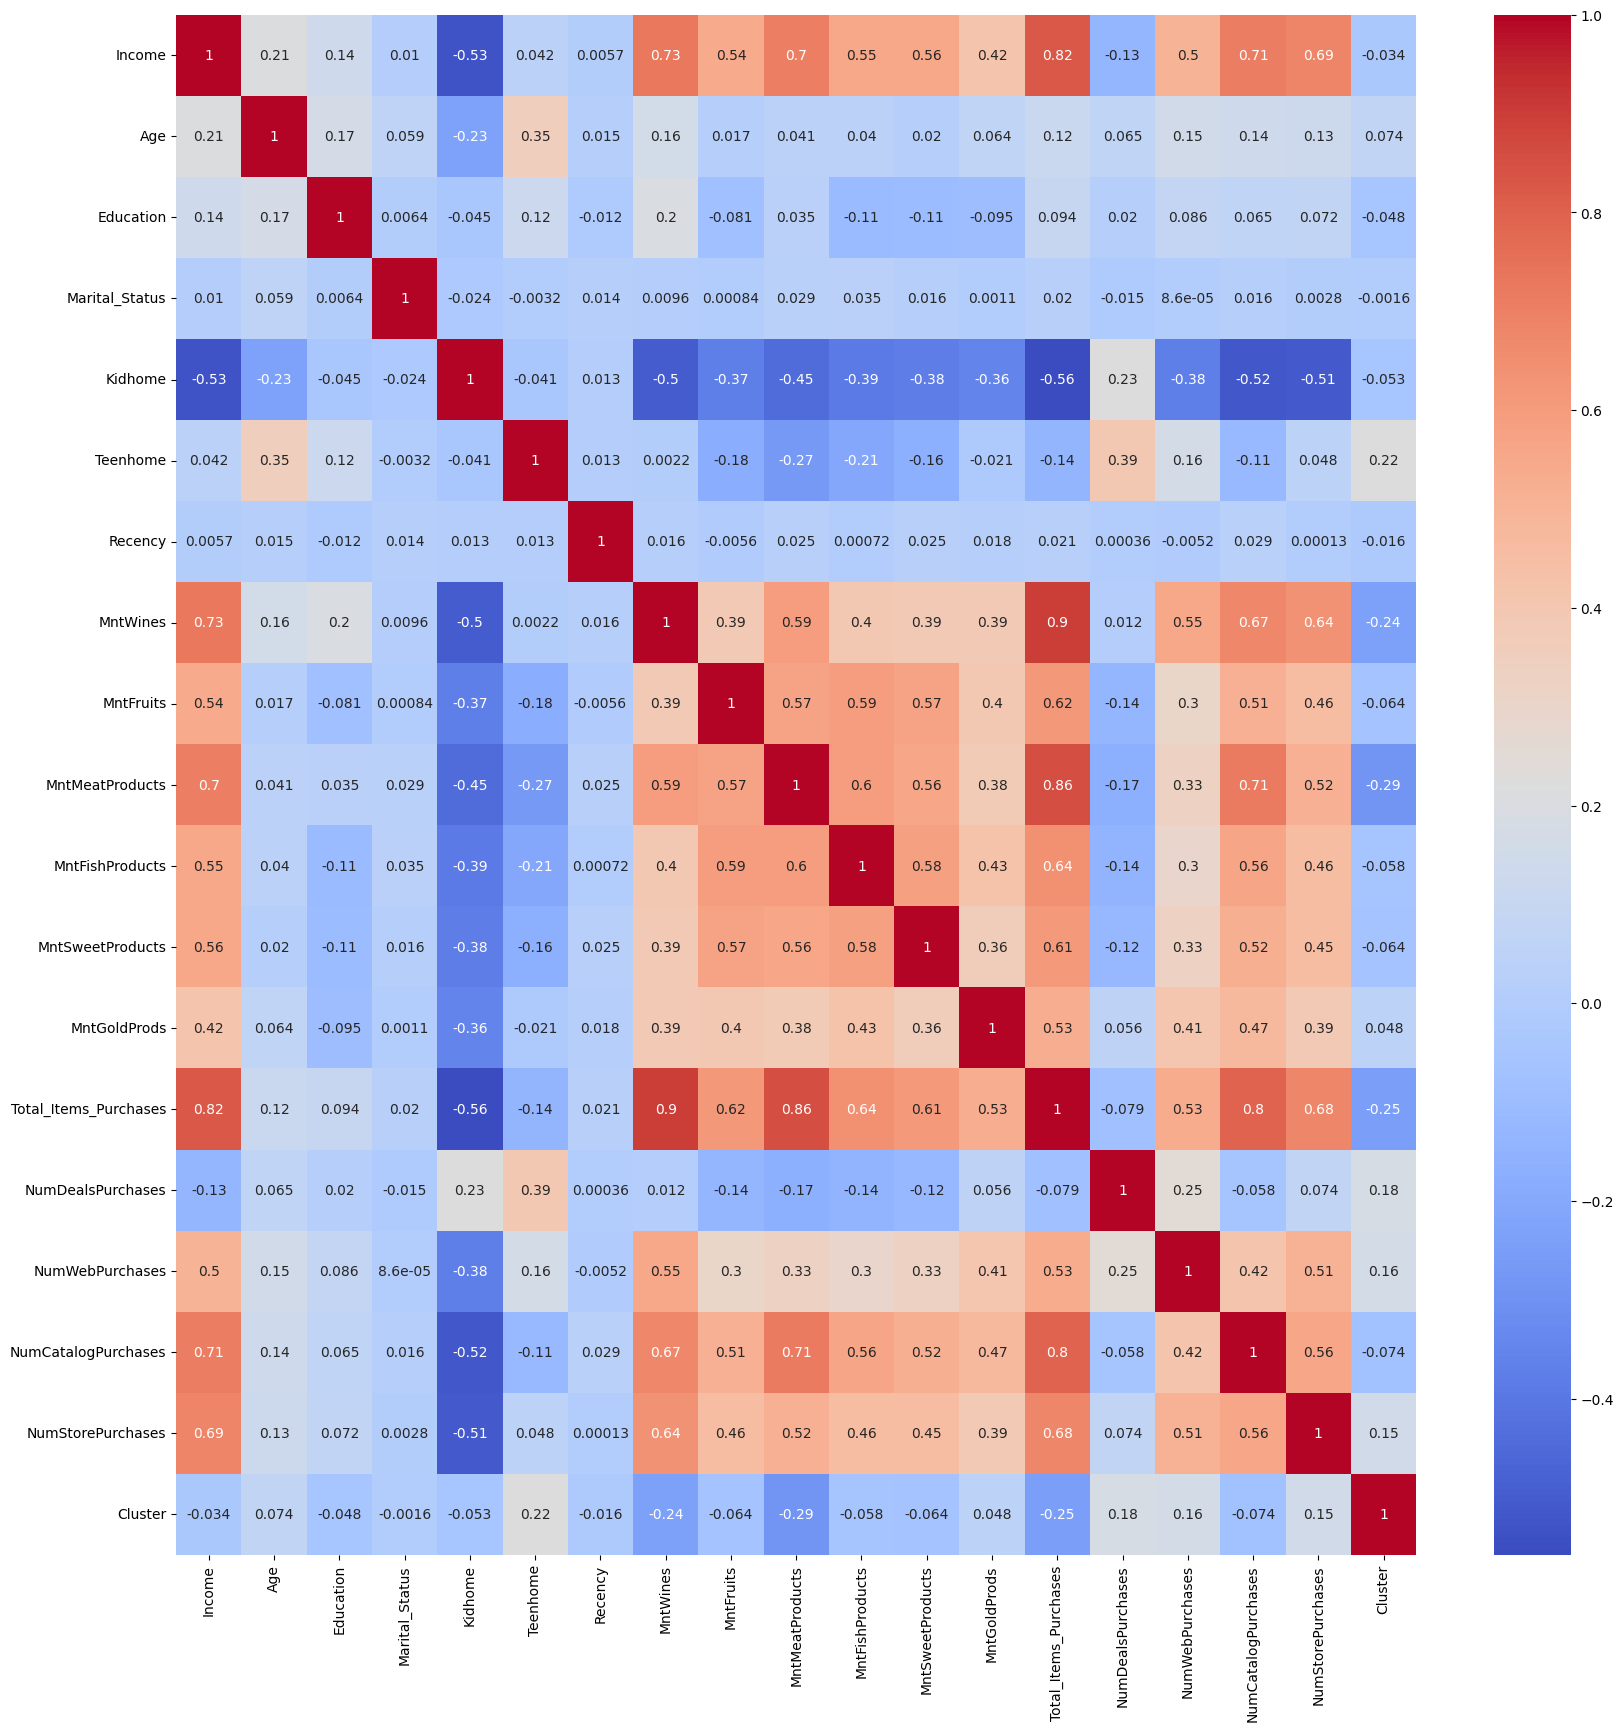

In [57]:
plt.figure(figsize=(20,20))
sns.heatmap(data= data_kmean.corr(), annot=True, cmap='coolwarm')

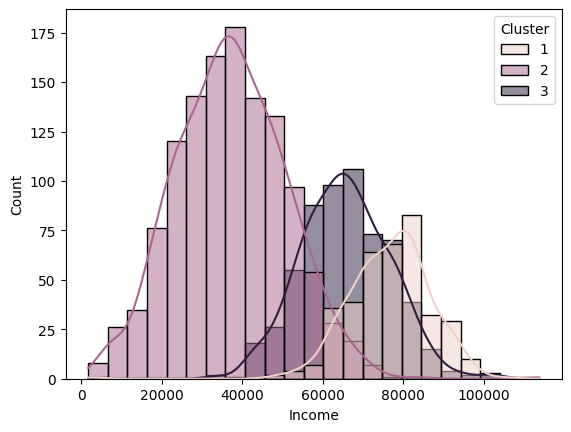

In [58]:
sns.histplot(data=data_kmean, x='Income', hue=data_kmean['Cluster'], kde=True)
plt.show()

In [59]:
data_kmean.groupby('Cluster')['Income'].mean()

Cluster
1    76596.377660
2    37221.489448
3    65583.266667
Name: Income, dtype: float64

Cluster 1 has a higher average income than other clusters

<Axes: xlabel='Total_Items_Purchases', ylabel='Count'>

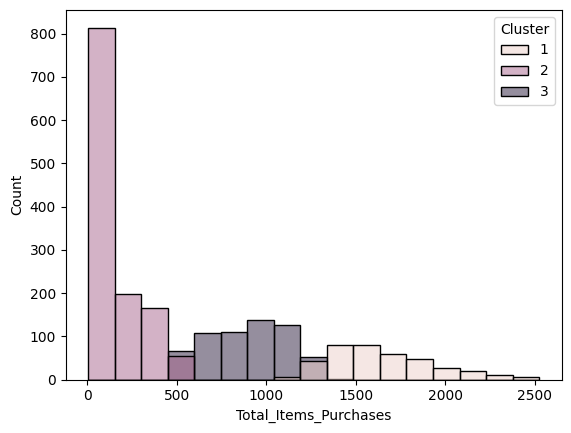

In [60]:
sns.histplot(data=data_kmean, x='Total_Items_Purchases', hue='Cluster')

In [61]:
data_kmean.groupby('Cluster')['Total_Items_Purchases'].mean()

Cluster
1    1645.976064
2     147.859578
3     898.220000
Name: Total_Items_Purchases, dtype: float64

Cluster 1 has the highest total purchases, indicating high activity, while Cluster 2 shows the lowest, suggesting less frequent buying. Cluster 3 falls in between, with moderate purchase totals. This variation highlights different purchasing behaviors across the clusters.

Text(0.5, 1.0, 'Age')

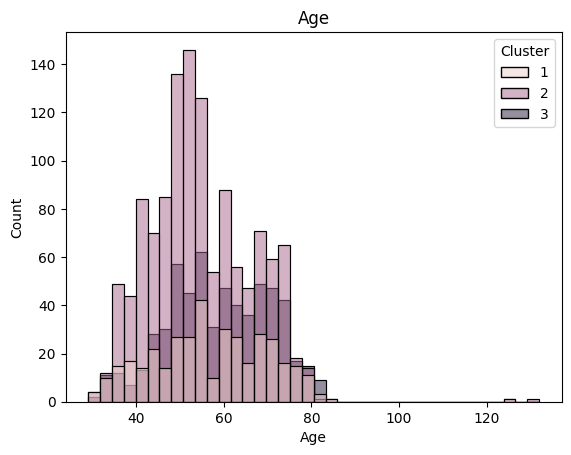

In [62]:
sns.histplot(data=data_kmean, x='Age', hue='Cluster')
plt.title('Age')

<Axes: xlabel='Teenhome', ylabel='count'>

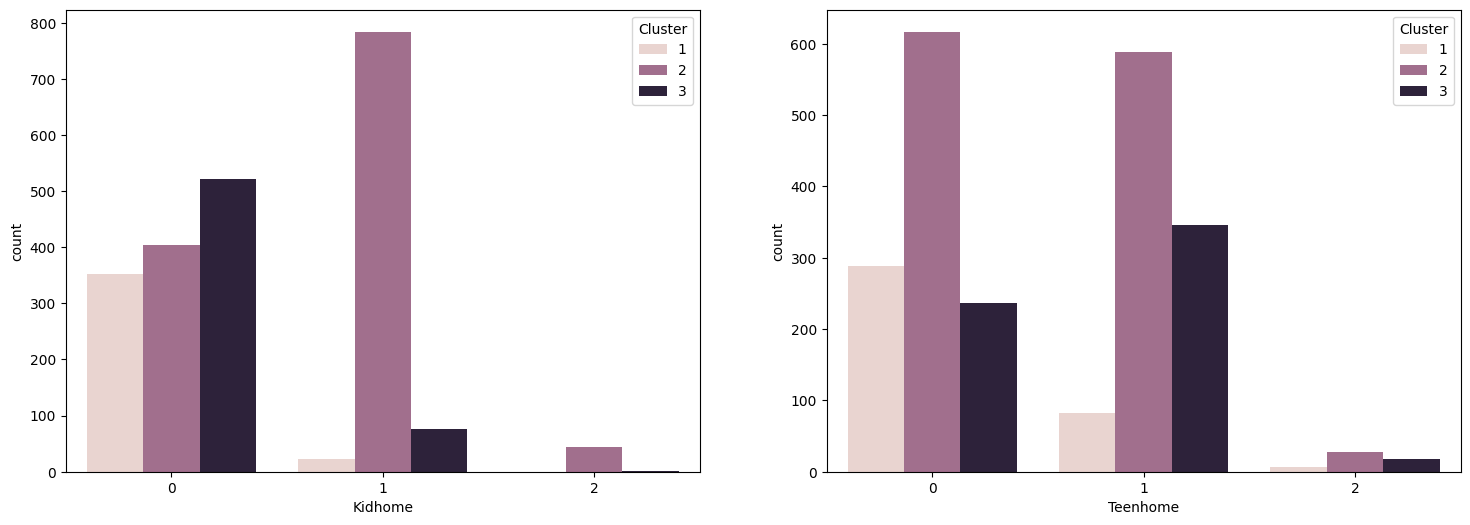

In [63]:
fig , axes = plt.subplots(nrows=1, ncols=2, figsize=(18,6))

sns.countplot(data=data_kmean, x='Kidhome', hue='Cluster', ax=axes[0])
sns.countplot(data=data_kmean, x='Teenhome', hue='Cluster', ax=axes[1])

<Axes: xlabel='Recency', ylabel='Count'>

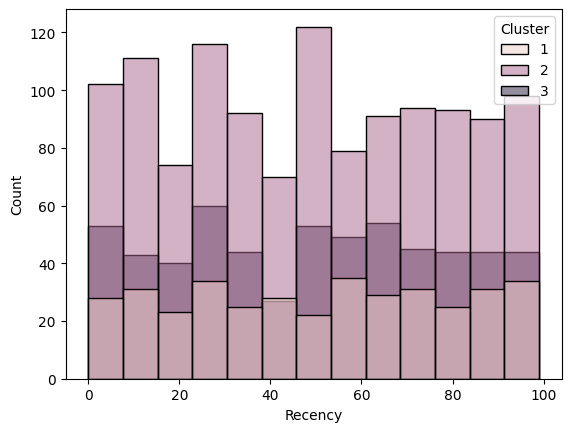

In [64]:
sns.histplot(data=data_kmean, x='Recency', hue='Cluster')

Cluster
1    1.630319
2    2.327922
3    2.723333
Name: NumDealsPurchases, dtype: float64

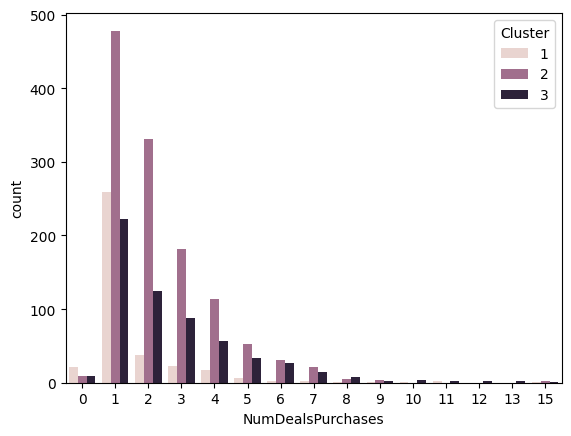

In [65]:
sns.countplot(data=data_kmean, x='NumDealsPurchases', hue='Cluster')

data_kmean.groupby('Cluster')['NumDealsPurchases'].mean()

On average, cluster 1 uses less discount than other clusters.

# Conclusion and Interpretation

OK, now we separate the data for each cluster.

In [66]:
# SEPARATE THE DATA FOR EACH CLUSTER

Cluster_1 = data_kmean[data_kmean['Cluster'] == 1]  # CLUSTER 1
Cluster_2 = data_kmean[data_kmean['Cluster'] == 2]  # CLUSTER 2
Cluster_3 = data_kmean[data_kmean['Cluster'] == 3]  # CLUSTER 3

len(Cluster_1) , len(Cluster_2) , len(Cluster_3)

(376, 1232, 600)

<h4 style='color:deepskyblue;'><strong>CLUSTER 1

In [67]:
Cluster_1.describe()

Income         Age   Education  Marital_Status     Kidhome  \
count     376.000000  376.000000  376.000000      376.000000  376.000000   
mean    76596.377660   56.986702    2.617021        3.728723    0.061170   
std     10204.619306   13.188574    1.044160        1.040935    0.239962   
min      2447.000000   30.000000    0.000000        2.000000    0.000000   
25%     70255.750000   47.000000    2.000000        3.000000    0.000000   
50%     77621.000000   56.000000    2.000000        4.000000    0.000000   
75%     82800.000000   67.000000    4.000000        5.000000    0.000000   
max    105471.000000  126.000000    4.000000        6.000000    1.000000   

         Teenhome     Recency     MntWines   MntFruits  MntMeatProducts  \
count  376.000000  376.000000   376.000000  376.000000       376.000000   
mean     0.250000   50.444149   849.771277   63.162234       502.082447   
std      0.469042   29.115898   277.880168   49.016272       250.739719   
min      0.000000    1.000000     1.000000    0.000000        45.000000   
25%      0.000000   25.750000   644.000000   24.000000       309.000000   
50%      0.000000   52.500000   854.000000   51.000000       485.000000   
75%      0.000000   74.250000  1025.250000   97.250000       706.000000   
max      2.000000   99.000000  1493.000000  190.000000      1725.000000   

       MntFishProducts  MntSweetProducts  MntGoldProds  Total_Items_Purchases  \
count       376.000000        376.000000    376.000000             376.000000   
mean         88.691489         64.757979     77.510638            1645.976064   
std          66.681816         52.309667     62.858952             285.713212   
min           0.000000          0.000000      0.000000            1178.000000   
25%          34.750000         24.000000     30.000000            1427.750000   
50%          75.000000         48.500000     54.500000            1596.500000   
75%         133.000000         99.250000    111.000000            1825.250000   
max         258.000000        198.000000    249.000000            2525.000000   

       NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
count         376.000000       376.000000           376.000000   
mean            1.630319         5.585106             6.090426   
std             1.723264         2.358122             2.577299   
min             0.000000         0.000000             2.000000   
25%             1.000000         4.000000             4.000000   
50%             1.000000         5.000000             6.000000   
75%             2.000000         7.000000             8.000000   
max            15.000000        11.000000            28.000000   

       NumStorePurchases  Cluster  
count         376.000000    376.0  
mean            8.367021      1.0  
std             2.825291      0.0  
min             0.000000      1.0  
25%             6.000000      1.0  
50%             8.000000      1.0  
75%            11.000000      1.0  
max            13.000000      1.0

<h5><ul><li>The average income in Cluster 1 is around 76,596 with a relatively high standard deviation (10,204)</li>
        <li>The mean age in this cluster was 56 years, with a large age variation (13 years).</li>
        <li>This cluster has an average value in the Marital Status category (3.7) which shows that most individuals in this cluster are married, while the average education level is 2.6, which shows that the majority have education levels up to high school or university.</li>
        <li>Average spending in categories such as MntWines (849), MntMeatProducts (502), and MntGoldProds (77) shows that members of this cluster tend to purchase more premium products or make more expensive consumer goods purchases more frequently than other clusters.</li>
        <li>Purchases made through multiple channels show a higher number of purchases, such as at NumStorePurchases with an average of 8.37 purchases per individual.</li>

<h4 style='color:yellow'><strong>CLUSTER 2

In [68]:
Cluster_2.describe()

Income          Age    Education  Marital_Status      Kidhome  \
count    1232.000000  1232.000000  1232.000000     1232.000000  1232.000000   
mean    37221.489448    54.664773     2.316558        3.725649     0.707792   
std     13620.529946    11.559423     1.138836        1.053126     0.527709   
min      1730.000000    29.000000     0.000000        1.000000     0.000000   
25%     27379.500000    47.000000     2.000000        3.000000     0.000000   
50%     36967.000000    53.000000     2.000000        4.000000     1.000000   
75%     46380.250000    63.000000     3.000000        5.000000     1.000000   
max    113734.000000   132.000000     4.000000        7.000000     2.000000   

          Teenhome      Recency     MntWines    MntFruits  MntMeatProducts  \
count  1232.000000  1232.000000  1232.000000  1232.000000      1232.000000   
mean      0.521104    48.702922    69.307630     7.034903        33.025162   
std       0.541871    29.050661    85.272376    12.200981        36.877674   
min       0.000000     0.000000     0.000000     0.000000         0.000000   
25%       0.000000    24.000000    10.000000     1.000000         9.000000   
50%       0.000000    49.000000    29.500000     3.000000        18.000000   
75%       1.000000    74.000000   100.000000     8.000000        45.000000   
max       2.000000    99.000000   416.000000   151.000000       288.000000   

       MntFishProducts  MntSweetProducts  MntGoldProds  Total_Items_Purchases  \
count      1232.000000       1232.000000   1232.000000            1232.000000   
mean         10.426948          7.247565     20.817370             147.859578   
std          18.726459         14.607330     28.535922             141.260833   
min           0.000000          0.000000      0.000000               5.000000   
25%           2.000000          1.000000      5.000000              43.000000   
50%           4.000000          3.000000     12.000000              79.000000   
75%          12.000000          8.000000     26.000000             233.000000   
max         179.000000        262.000000    321.000000             577.000000   

       NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
count        1232.000000      1232.000000          1232.000000   
mean            2.327922         2.672078             0.785714   
std             1.668147         2.075253             0.999362   
min             0.000000         0.000000             0.000000   
25%             1.000000         1.000000             0.000000   
50%             2.000000         2.000000             1.000000   
75%             3.000000         3.000000             1.000000   
max            15.000000        27.000000             9.000000   

       NumStorePurchases  Cluster  
count        1232.000000   1232.0  
mean            3.686688      2.0  
std             1.592290      0.0  
min             0.000000      2.0  
25%             3.000000      2.0  
50%             3.000000      2.0  
75%             4.000000      2.0  
max            13.000000      2.0

<h5><ul><li>The average income in this cluster is 37,221, much lower than Cluster 1. With a standard deviation of 13,620, there is still variation, but in general, their incomes tend to be lower, ranging from 1,730 to 113,734.</li>
        <li>The average age was 53.7 years. Compared to Cluster 1, the average age was younger, but still older than the general population average.</li>
        <li>Most of the members of this cluster are married with an average score of 3.7 on Marital Status. They have an average education level of 2.3,</li>
        <li>This cluster has lower spending than Cluster 1. For example, MntWines has an average of only 69, which is much lower than Cluster 1.</li>
        <li>This cluster tends to shop less across channels than Cluster 1.</li>

<h4 style='color:green;'><strong>CLUSTER 3

In [69]:
Cluster_3.describe()

Income         Age   Education  Marital_Status     Kidhome  \
count     600.000000  600.000000  600.000000      600.000000  600.000000   
mean    65583.266667   58.833333    2.403333        3.723333    0.135000   
std     11003.257939   11.583286    1.123726        1.148472    0.351636   
min     33051.000000   30.000000    0.000000        0.000000    0.000000   
25%     57949.750000   50.000000    2.000000        3.000000    0.000000   
50%     65328.500000   59.000000    2.000000        3.000000    0.000000   
75%     72635.000000   69.000000    3.000000        5.000000    0.000000   
max    102692.000000   82.000000    4.000000        6.000000    2.000000   

         Teenhome     Recency     MntWines   MntFruits  MntMeatProducts  \
count  600.000000  600.000000   600.000000  600.000000        600.00000   
mean     0.636667   48.756667   451.616667   43.255000        226.03000   
std      0.540193   28.616411   185.384921   46.201417        147.75818   
min      0.000000    0.000000    68.000000    0.000000         21.00000   
25%      0.000000   24.000000   316.750000    9.000000        115.00000   
50%      1.000000   50.000000   434.000000   26.000000        184.50000   
75%      1.000000   72.000000   571.250000   61.250000        305.00000   
max      2.000000   99.000000  1000.000000  199.000000        818.00000   

       MntFishProducts  MntSweetProducts  MntGoldProds  Total_Items_Purchases  \
count       600.000000        600.000000    600.000000             600.000000   
mean         61.961667         44.346667     71.010000             898.220000   
std          61.757998         45.593066     56.728271             217.762637   
min           0.000000          0.000000      0.000000             486.000000   
25%          13.000000          9.000000     29.000000             725.000000   
50%          39.500000         29.000000     54.000000             907.500000   
75%          93.000000         64.000000    102.000000            1080.500000   
max         259.000000        195.000000    248.000000            1367.000000   

       NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
count         600.000000       600.000000           600.000000   
mean            2.723333         6.095000             4.303333   
std             2.249123         2.387217             2.308001   
min             0.000000         1.000000             1.000000   
25%             1.000000         4.000000             3.000000   
50%             2.000000         6.000000             4.000000   
75%             4.000000         8.000000             6.000000   
max            15.000000        11.000000            11.000000   

       NumStorePurchases  Cluster  
count         600.000000    600.0  
mean            8.601667      3.0  
std             2.707745      0.0  
min             3.000000      3.0  
25%             6.000000      3.0  
50%             8.000000      3.0  
75%            11.000000      3.0  
max            13.000000      3.0

<h5><ul><li>The average income in this cluster is 65,583, higher than Cluster 2, but lower than Cluster 1. With a standard deviation of 11,003, it shows that although the income of this cluster is higher than Cluster 2, there is little variation in income.</li>
        <li>The average age is 57.8 years, indicating that this cluster is older than Cluster 2, but younger than Cluster 1.</li>
        <li>Most of the members of this cluster have a married status with an average of 3.7 in Marital Status. Their education level is slightly higher with an average of 2.4</li>
        <li>Spending on premium products such as MntWines (451) is lower than Cluster 1, but higher than Cluster 2. This indicates a tendency to make higher consumption product purchases, but still tends to be more economical than Cluster 1.</li>
        <li>This cluster makes purchases more frequently than Cluster 2, especially in the NumStorePurchases category with an average of 8.6 purchases.</li>

<h4><strong>CONCLUSION : </strong></h4>
<h5>
<ol>
    <li style='color:deepskyblue; font-weight:bold;'>CLUSTER 1</li>
    <ul>
        <li>This cluster consists of individuals with higher incomes and older ages. They make more frequent purchases of premium consumer goods, especially in the food sector and luxury products such as gold. They are more active in purchasing goods offline (through stores).</li>
        <li><strong>Name Cluster : Premium Consumers </li></strong>
    </ul><br>
    <li style='color:yellow; font-weight:bold;'>CLUSTER 2</li>
    <ul>
        <li>This cluster consists of individuals with lower incomes and younger ages than Cluster 1. They tend to be more frugal in spending and make fewer premium purchases. Their purchases are mostly made online or through other more affordable channels.</li>
        <li><strong>Name Cluster : Value Seekers </li></strong>
    </ul><br>
    <li style='color:green; font-weight:bold;'>CLUSTER 3 </li>
    <ul>
        <li>Individuals in Cluster 3 have higher incomes than Cluster 2, with slightly higher expenditures than Cluster 2 but lower than Cluster 1. They tend to be older and shop more frequently through multiple channels.</li>
        <li><strong>Name Cluster : Middle-Class Shoppers </li></strong>


<h4><strong><center>BUSSINESS ANALYSIS</center></h4></strong>
<h4><strong>MARKETING STRATEGY : </h4></strong>

<ol>
    <li style='color:deepskyblue; font-weight:bold;'>CLUSTER 1 (PREMIUM CONSUMERS)</li>
    <ul>
        <li>Focus on premium and luxury products, such as wine, high-quality meat products, or luxury goods such as gold jewelry.</li>
        <li>Offer an exclusive and personalized shopping experience, for example through more personalized customer service or special events.</li>
        <li>Consider offering exclusive deals to loyal customers in physical stores or through loyalty programs.</li>
    </ul><br>
    <li style='color:yellow; font-weight:bold;'>CLUSTER 2 (VALUE SEEKERS)</li>
    <ul>
        <li>Focus on offering more affordable products with added value, such as big discounts or bundled packages.</li>
        <li>Strengthen online sales channels, including promotions through e-commerce and digital campaigns that highlight price and value.</li>
        <li>Provide special offers for younger customers, such as discounts or seasonal promotions that can attract their attention.</li>
    </ul><br>
    <li style='color:green; font-weight:bold;'>CLUSTER 3 (MIDDLE-CLASS SHOPPERS)</li>
    <ul>
        <li>Focus on products that provide a balance between quality and price, such as everyday necessities or products with affordable but premium brands.</li>
        <li>Take advantage of multiple channels, both online and offline, with offers tailored to both in-store and online shopping.</li>
        <li>Offer loyalty programs that can attract frequent shoppers, such as reward points for repeat purchases.</li>
    </ul>

In [70]:
# Save a new cluster to csv
data_kmean.to_csv(path_or_buf='Dataset/df_clustered.csv',index=False)